# Problem:

To predicting the “Fraud in auto insurance claims” & Pattern extraction

# Business case:
claim related fraud is a huge problem in the insurance industry. It is quite complex and difficult to identify those unwanted claims. I am trying to troubleshoot and help the General Insurance industry with this problem by using some Machine Learning Algorthims.

if insurance frauds are classified into two types:
* Source type frauds
* Nature type frauds
  
**Source Type:**
  1. policyholder
  2. intermediary and/or internal

**Nature Type:**
  1. Application
  2. Inflation
  3. Identity
  4. Fabrication
  5. Staged/contrived/induced accidents

## Data Description
About Data: if our data consists more missing values. it can be represented as different types of character(#Like:'NA','?','???','-1',etc#).

#### Demographics Data:
|column| : |description|

|CustomerID| : |Customer ID|

|InsuredAge| : |age|

|InsuredEducationLevel| : |Education|

|InsuredGender| : |Gender| - |the missing value is represented as “NA”|

|InsuredEducationLevel| : |Education|

|InsuredOccupation| : |Occupation|

|InsuredHobbies| : |Hobbies|

|CapitalGains| : |Capital gains(Financial Status)|

|CapitalLoss| : |capital loss(Financial Status)|

|Country bold text| : |Country|

#### Policy Information:

CustomerID : Customer ID.

CustomerLoyaltyPeriod : Duration of customer relationship.

InsurancePolicyNumber : policy number

DateOfPolicyCoverage : policy commencement date

InsurancePolicyState : Policy location (State)

Policy_CombinedSingleLimit : Split Limit and Combined Single Limit

Policy_Deductible : Deductible amount

PolicyAnnualPremium : Annual Premium – the missing value is represented as “-1”

UmbrellaLimit : Umbrella Limit amount

InsuredRelationship : Realtionship

#### Claim Information :

CustomerID : Customer ID

DateOfIncident : Date of incident

TypeOfIncident : Type of incident

TypeOfCollission : Type of Collision - “?” is the missing value

SeverityOfIncident : Collision severity

AuthoritiesContacted : Which authorities are contacted

IncidentState : Incident location (State)

IncidentCity : Incident location (City)

IncidentAddress : Incident location (address)

IncidentTime : time of incident – Hour of the day - the missing value is represented as “-5”

NumberOfVehicles : Number of vehicles involved

PropertyDamage : If property damage is there - “?” is the missing value

BodilyInjuries : Number of bodily injuries

Witnesses : Number of witnesses - missing value is represented as "MISSINGVALUE"

PoliceReport : If police report available - “?” is the missing value

AmountOfTotalClaim : Total claim amount - the missing value is represented as “MISSEDDATA”

AmountOfInjuryClaim : Claim for injury

AmountOfPropertyClaim : claim for property damage

AmountOfVehicleDamage : claim for vehicle damage

#### Vehicle Data:

CustomerID : Customer ID

VehicleAttribute : Service signed for

VehicleAttributeDetails : Value of the vehicle attribute - the missing value is represented as “???”

Fraud Data :

|CustomerID| : |Customer ID|

|--| : |--|

|ReportedFraud| : |Fraud or not – Targe|

# Load the required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the train data

In [ ]:
# we can see some missing values denoted by ['?','-5','-1','NA','???'..etc] so reading missing values as np.nan
train_claim = pd.read_csv('/content/drive/MyDrive/chakri/Train_Claim.csv', na_values=['?','-5','MISSINGVALUE','MISSEDDATA'])
train_demo = pd.read_csv('/content/drive/MyDrive/chakri/Train_Demographics.csv',na_values = ['NA'])
train_policy = pd.read_csv('/content/drive/MyDrive/chakri/Train_Policy.csv',na_values = ['-1'])
train_vehicle = pd.read_csv('/content/drive/MyDrive/chakri/Train_Vehicle.csv',na_values=['???'])
train_target = pd.read_csv('/content/drive/MyDrive/chakri/Traindata_with_Target.csv')
train_wo_target = pd.read_excel('/content/drive/MyDrive/chakri/Traindata_withoutTarget.xlsx')

### Understand the Data - - Exploratory Data Analysis (EDA)

 Now, that we have imported our dataset, its time to gain some insights about our data.
 
 Let's preview the dataset.
 
 view no.of rows & columns in each dataset

In [ ]:
print(train_claim.shape)
print(train_demo.shape)
print(train_policy.shape)
print(train_vehicle.shape)
print(train_target.shape)
print(train_wo_target.shape)

(28836, 19)
(28836, 10)
(28836, 10)
(115344, 3)
(28836, 2)
(28836, 2)


### Vehicle Data

In [ ]:
train_vehicle.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212


In [ ]:
train_vehicle.nunique()

CustomerID                 28836
VehicleAttribute               4
VehicleAttributeDetails    28910
dtype: int64

In [ ]:
train_vehicle['VehicleAttribute'].value_counts()

VehicleID       28836
VehicleModel    28836
VehicleMake     28836
VehicleYOM      28836
Name: VehicleAttribute, dtype: int64

In [ ]:
vehicle = train_vehicle.groupby('VehicleAttribute')

In [ ]:
vehicleID = vehicle.get_group('VehicleID')
vehicleID['VehicleID'] = vehicleID['VehicleAttributeDetails']
vehicleID.drop(['VehicleAttribute','VehicleAttributeDetails'],axis = 1, inplace = True)

In [ ]:
vehicleMake = vehicle.get_group('VehicleMake')
vehicleMake['VehicleMake'] = vehicleMake['VehicleAttributeDetails']
vehicleMake.drop(['VehicleAttribute','VehicleAttributeDetails'],axis = 1, inplace = True)

In [ ]:
vehicleModel = vehicle.get_group('VehicleModel')
vehicleModel['VehicleModel'] = vehicleModel['VehicleAttributeDetails']
vehicleModel.drop(['VehicleAttribute','VehicleAttributeDetails'],axis = 1, inplace = True)

In [ ]:
vehicleYOM = vehicle.get_group('VehicleYOM')
vehicleYOM['VehicleYOM'] = vehicleYOM['VehicleAttributeDetails']
vehicleYOM.drop(['VehicleAttribute','VehicleAttributeDetails'],axis = 1, inplace = True)

## Merge all the train datasets

In [ ]:
#merging given data on identical columns
train_vehicle = pd.merge(pd.merge(pd.merge(vehicleID,vehicleMake),vehicleModel),vehicleYOM)

In [ ]:
train_vehicle

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust20179,Vehicle8898,BMW,Forrestor,2011
1,Cust13038,Vehicle30212,Toyota,Maxima,2000
2,Cust1801,Vehicle24096,Accura,MDX,1999
3,Cust14947,Vehicle15216,Nissan,Ultima,1998
4,Cust19144,Vehicle29018,Ford,Fusion,2011
...,...,...,...,...,...
28831,Cust2970,Vehicle19228,Audi,Pathfinder,2003
28832,Cust19731,Vehicle12644,Chevrolet,Malibu,2014
28833,Cust25338,Vehicle28831,Saab,95,2011
28834,Cust7637,Vehicle12870,Ford,Fusion,2008


In [ ]:
df = pd.merge (pd.merge( pd.merge (pd.merge(train_demo,train_policy),train_claim),train_vehicle),train_target)

## Load the test data

In [ ]:
test_csv = pd.read_csv('/content/drive/MyDrive/chakri_test/Test.csv')
test_claim = pd.read_csv('/content/drive/MyDrive/chakri_test/Test_Claim.csv', na_values = ['?','-5','MISSINGVALUE','MISSEDDATA'])
test_demo = pd.read_csv('/content/drive/MyDrive/chakri_test/Test_Demographics.csv', na_values =['NA'])
test_policy = pd.read_csv('/content/drive/MyDrive/chakri_test/Test_Policy.csv', na_values = ['-1'])
test_vehicle = pd.read_csv('/content/drive/MyDrive/chakri_test/Test_Vehicle.csv', na_values = ['???'])

In [ ]:
test_vehicle.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust28465,VehicleModel,92x
1,Cust20319,VehicleModel,Jetta
2,Cust3683,VehicleID,Vehicle22709
3,Cust29385,VehicleID,Vehicle20347
4,Cust34403,VehicleModel,Camry


In [ ]:
test_vehicle.nunique()

CustomerID                 8912
VehicleAttribute              4
VehicleAttributeDetails    8985
dtype: int64

In [ ]:
test_vehicle['VehicleAttribute'].value_counts()

VehicleModel    8912
VehicleID       8912
VehicleYOM      8912
VehicleMake     8912
Name: VehicleAttribute, dtype: int64

In [ ]:
vehicle_test = test_vehicle.groupby('VehicleAttribute')

In [ ]:
vehicleID = vehicle_test.get_group('VehicleID')
vehicleID['VehicleID'] = vehicleID['VehicleAttributeDetails']
vehicleID.drop(['VehicleAttribute','VehicleAttributeDetails'],axis = 1, inplace = True)

In [ ]:
vehicleMake = vehicle_test.get_group('VehicleMake')
vehicleMake['VehicleMake'] = vehicleMake['VehicleAttributeDetails']
vehicleMake.drop(['VehicleAttribute','VehicleAttributeDetails'],axis = 1, inplace = True)

In [ ]:
vehicleModel = vehicle_test.get_group('VehicleModel')
vehicleModel['VehicleModel'] = vehicleModel['VehicleAttributeDetails']
vehicleModel.drop(['VehicleAttribute','VehicleAttributeDetails'],axis = 1, inplace = True)

In [ ]:
vehicleYOM = vehicle_test.get_group('VehicleYOM')
vehicleYOM['VehicleYOM'] = vehicleYOM['VehicleAttributeDetails']
vehicleYOM.drop(['VehicleAttribute','VehicleAttributeDetails'],axis = 1, inplace = True)

Merge all the test datasets

In [ ]:
test_vehicle = pd.merge(pd.merge(pd.merge(vehicleID,vehicleMake),vehicleModel),vehicleYOM)

In [ ]:
df_test = pd.merge (pd.merge( pd.merge(pd.merge(test_csv,test_demo),test_policy),test_claim),test_vehicle)

###### let's view the shape of the dataset and column names


In [ ]:
print('Train_Dataset has ' + str(df.shape[0]) + ' rows, and ' + str(df.shape[1]) + ' columns')
print('Test_Dataset has ' + str(df_test.shape[0]) + 'rows, and ' + str(df_test.shape[1]) + 'columns')

Train_Dataset has 28836 rows, and 42 columns
Test_Dataset has 8912rows, and 41columns


In [ ]:
print(df.shape)
print(df_test.shape)

print(df.columns)
print(df_test.columns)

(28836, 42)
(8912, 41)
Index(['CustomerID', 'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country', 'InsurancePolicyNumber',
       'CustomerLoyaltyPeriod', 'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       'DateOfIncident', 'TypeOfIncident', 'TypeOfCollission',
       'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState',
       'IncidentCity', 'IncidentAddress', 'IncidentTime', 'NumberOfVehicles',
       'PropertyDamage', 'BodilyInjuries', 'Witnesses', 'PoliceReport',
       'AmountOfTotalClaim', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'VehicleID', 'VehicleMake', 'VehicleModel',
       'VehicleYOM', 'ReportedFraud'],
      dtype='object')
Index(['CustomerID', 'InsuredAge', 'InsuredZipCode', 'Ins

 ##### Check the datatype of each variable

In [ ]:
df.dtypes

CustomerID                     object
InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss                     int64
Country                        object
InsurancePolicyNumber           int64
CustomerLoyaltyPeriod           int64
DateOfPolicyCoverage           object
InsurancePolicyState           object
Policy_CombinedSingleLimit     object
Policy_Deductible               int64
PolicyAnnualPremium           float64
UmbrellaLimit                   int64
InsuredRelationship            object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddr

##### Check basic summary statistics of the data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
InsuredAge,28836.0,38.815370,7.996377e+00,19.00,33.000,38.00,44.00,64.00
InsuredZipCode,28836.0,502436.579068,7.225087e+04,430104.00,448603.000,466691.00,603848.00,620962.00
CapitalGains,28836.0,23066.569566,2.763781e+04,0.00,0.000,0.00,49000.00,100500.00
CapitalLoss,28836.0,-24940.612429,2.791321e+04,-111100.00,-50000.000,0.00,0.00,0.00
InsurancePolicyNumber,28836.0,129312.517097,1.111406e+04,110122.00,119698.750,129278.50,138933.25,148619.00
CustomerLoyaltyPeriod,28836.0,203.067867,9.993295e+01,1.00,126.000,199.00,267.00,479.00
Policy_Deductible,28836.0,1114.282529,5.466328e+02,500.00,622.000,1000.00,1627.00,2000.00
PolicyAnnualPremium,28695.0,1261.702646,2.053852e+02,436.28,1124.425,1266.44,1397.20,2047.59
UmbrellaLimit,28836.0,983668.034436,1.969282e+06,-1000000.00,0.000,0.00,485961.00,10000000.00
IncidentTime,28805.0,11.764069,6.148869e+00,0.00,6.000,12.00,17.00,23.00


In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
InsuredAge,8912.0,38.743492,7.914619e+00,19.00,33.00,38.00,44.00,64.00
InsuredZipCode,8912.0,501558.312949,7.205190e+04,430104.00,447469.00,466303.00,603527.00,620962.00
CapitalGains,8912.0,23413.004937,2.782133e+04,0.00,0.00,0.00,49900.00,100500.00
CapitalLoss,8912.0,-25365.888689,2.803296e+04,-111100.00,-50400.00,0.00,0.00,0.00
InsurancePolicyNumber,8912.0,130481.939295,1.087902e+04,110124.00,121312.50,130807.00,139904.00,148617.00
CustomerLoyaltyPeriod,8912.0,203.055206,9.842325e+01,0.00,127.00,199.00,265.00,478.00
Policy_Deductible,8912.0,1123.580790,5.531397e+02,500.00,622.00,1000.00,1691.25,2000.00
PolicyAnnualPremium,8865.0,1260.235059,2.055341e+02,433.33,1119.46,1265.84,1399.24,2033.54
UmbrellaLimit,8912.0,931859.361535,1.919603e+06,-883692.00,0.00,0.00,283681.00,9699227.00
IncidentTime,8905.0,11.785963,6.157104e+00,0.00,6.00,12.00,17.00,23.00


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8912 entries, 0 to 8911
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  8912 non-null   object 
 1   InsuredAge                  8912 non-null   int64  
 2   InsuredZipCode              8912 non-null   int64  
 3   InsuredGender               8904 non-null   object 
 4   InsuredEducationLevel       8912 non-null   object 
 5   InsuredOccupation           8912 non-null   object 
 6   InsuredHobbies              8912 non-null   object 
 7   CapitalGains                8912 non-null   int64  
 8   CapitalLoss                 8912 non-null   int64  
 9   Country                     8908 non-null   object 
 10  InsurancePolicyNumber       8912 non-null   int64  
 11  CustomerLoyaltyPeriod       8912 non-null   int64  
 12  DateOfPolicyCoverage        8912 non-null   object 
 13  InsurancePolicyState        8912 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   InsuredAge                  28836 non-null  int64  
 2   InsuredZipCode              28836 non-null  int64  
 3   InsuredGender               28806 non-null  object 
 4   InsuredEducationLevel       28836 non-null  object 
 5   InsuredOccupation           28836 non-null  object 
 6   InsuredHobbies              28836 non-null  object 
 7   CapitalGains                28836 non-null  int64  
 8   CapitalLoss                 28836 non-null  int64  
 9   Country                     28834 non-null  object 
 10  InsurancePolicyNumber       28836 non-null  int64  
 11  CustomerLoyaltyPeriod       28836 non-null  int64  
 12  DateOfPolicyCoverage        28836 non-null  object 
 13  InsurancePolicyState        288

##### Check the number of unique levels in each attribute

In [ ]:
df.nunique()

CustomerID                    28836
InsuredAge                       46
InsuredZipCode                  995
InsuredGender                     2
InsuredEducationLevel             7
InsuredOccupation                14
InsuredHobbies                   20
CapitalGains                    338
CapitalLoss                     354
Country                           1
InsurancePolicyNumber         28836
CustomerLoyaltyPeriod           479
DateOfPolicyCoverage           6779
InsurancePolicyState              3
Policy_CombinedSingleLimit        9
Policy_Deductible              1496
PolicyAnnualPremium           23851
UmbrellaLimit                  7089
InsuredRelationship               6
DateOfIncident                   72
TypeOfIncident                    4
TypeOfCollission                  3
SeverityOfIncident                4
AuthoritiesContacted              5
IncidentState                     7
IncidentCity                      7
IncidentAddress                1000
IncidentTime                

In [ ]:
df_test.nunique()

CustomerID                    8912
InsuredAge                      46
InsuredZipCode                 994
InsuredGender                    2
InsuredEducationLevel            7
InsuredOccupation               14
InsuredHobbies                  20
CapitalGains                   338
CapitalLoss                    353
Country                          1
InsurancePolicyNumber         8912
CustomerLoyaltyPeriod          476
DateOfPolicyCoverage          4533
InsurancePolicyState             3
Policy_CombinedSingleLimit       9
Policy_Deductible             1292
PolicyAnnualPremium           8356
UmbrellaLimit                 2144
InsuredRelationship              6
DateOfIncident                  67
TypeOfIncident                   4
TypeOfCollission                 3
SeverityOfIncident               4
AuthoritiesContacted             5
IncidentState                    7
IncidentCity                     7
IncidentAddress                996
IncidentTime                    24
NumberOfVehicles    

####check null values in dataframe

In [ ]:
df.isna().sum()

CustomerID                        0
InsuredAge                        0
InsuredZipCode                    0
InsuredGender                    30
InsuredEducationLevel             0
InsuredOccupation                 0
InsuredHobbies                    0
CapitalGains                      0
CapitalLoss                       0
Country                           2
InsurancePolicyNumber             0
CustomerLoyaltyPeriod             0
DateOfPolicyCoverage              0
InsurancePolicyState              0
Policy_CombinedSingleLimit        0
Policy_Deductible                 0
PolicyAnnualPremium             141
UmbrellaLimit                     0
InsuredRelationship               0
DateOfIncident                    0
TypeOfIncident                    0
TypeOfCollission               5162
SeverityOfIncident                0
AuthoritiesContacted              0
IncidentState                     0
IncidentCity                      0
IncidentAddress                   0
IncidentTime                

In [ ]:
df_test.isna().sum()

CustomerID                       0
InsuredAge                       0
InsuredZipCode                   0
InsuredGender                    8
InsuredEducationLevel            0
InsuredOccupation                0
InsuredHobbies                   0
CapitalGains                     0
CapitalLoss                      0
Country                          4
InsurancePolicyNumber            0
CustomerLoyaltyPeriod            0
DateOfPolicyCoverage             0
InsurancePolicyState             0
Policy_CombinedSingleLimit       0
Policy_Deductible                0
PolicyAnnualPremium             47
UmbrellaLimit                    0
InsuredRelationship              0
DateOfIncident                   0
TypeOfIncident                   0
TypeOfCollission              1763
SeverityOfIncident               0
AuthoritiesContacted             0
IncidentState                    0
IncidentCity                     0
IncidentAddress                  0
IncidentTime                     7
NumberOfVehicles    

### Check for value counts in target variable

In [ ]:
df['ReportedFraud'].value_counts()

N    21051
Y     7785
Name: ReportedFraud, dtype: int64

In [ ]:
df.ReportedFraud.value_counts(normalize=True)*100

N    73.002497
Y    26.997503
Name: ReportedFraud, dtype: float64

<Axes: xlabel='ReportedFraud', ylabel='count'>

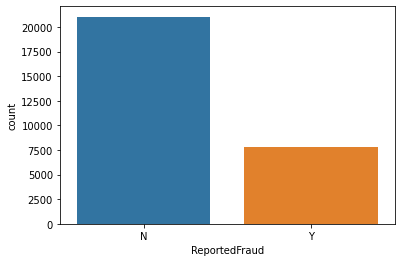

In [ ]:
sns.countplot(x ='ReportedFraud',data = df)

Our data is very imbalanced

###We will visualize the data and see if there is any feature which might influence the claims

Insured education level vs Reportedfraud




<Axes: xlabel='InsuredEducationLevel', ylabel='count'>

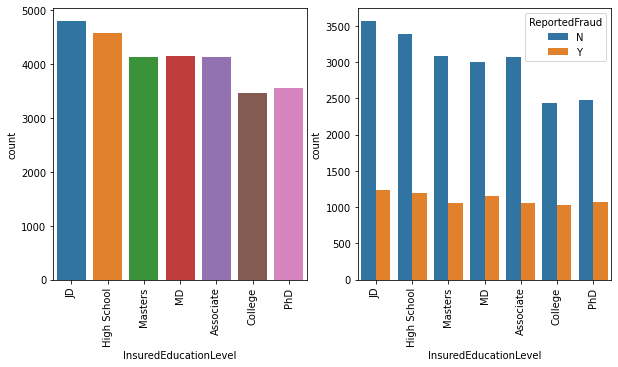

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.countplot(x = df['InsuredEducationLevel'])
plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.countplot(x = 'InsuredEducationLevel',hue = 'ReportedFraud', data = df)

insured occupation vs fraud reported

<Axes: xlabel='InsuredOccupation', ylabel='count'>

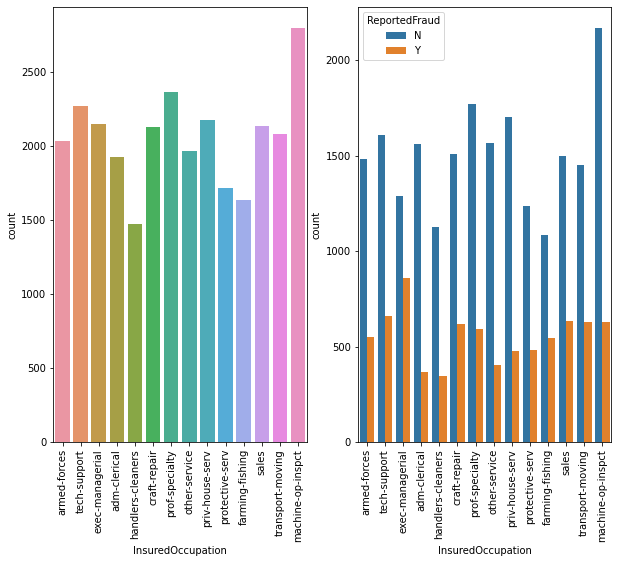

In [ ]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.countplot(x = df['InsuredOccupation'])
plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.countplot(x = df['InsuredOccupation'], hue = 'ReportedFraud', data = df)

From the data, it looks like people in exec-managerial positions have more number of frauds compared to other occupations.

Sales, tech-support and transport moving also have relatively high cases of fraud.


<Axes: xlabel='TypeOfIncident', ylabel='count'>

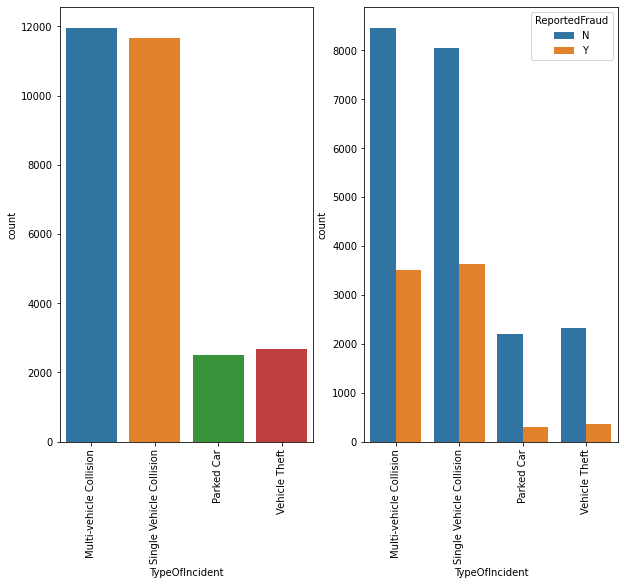

In [ ]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.countplot(x = 'TypeOfIncident', data = df)
plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.countplot(x = 'TypeOfIncident', hue = 'ReportedFraud', data = df)

Multi-vehicle and single vehicle collisions have more number of frauds compared to parked and vehicle theft. One of the reasons could be that in a collision, there is high possibility of more damage to car, as well as the passengers and hence the need to file false insurance claims.



<Axes: xlabel='SeverityOfIncident', ylabel='count'>

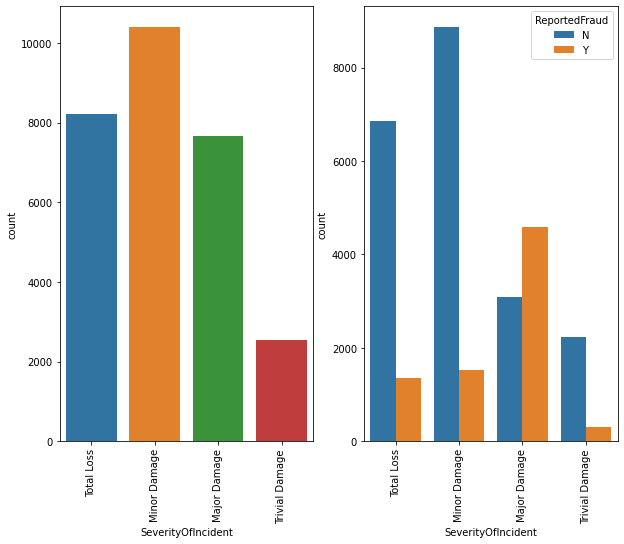

In [ ]:
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.countplot(x = 'SeverityOfIncident', data = df)
plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.countplot(x = 'SeverityOfIncident', hue = 'ReportedFraud', data = df)

Here, compared to minor damage, total loss and trivial damage, fraudulent claims are highest in major damage.

One of the reason could be that the high amount of repair cost which will be incurred by the insurer due to major damage.

Authoritiescontacted vs ReportedFraud

<Axes: xlabel='AuthoritiesContacted', ylabel='count'>

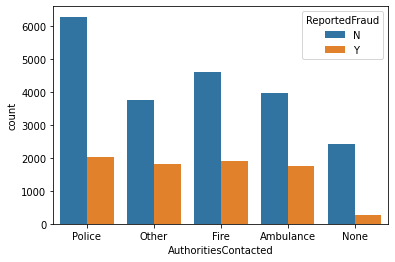

In [ ]:
sns.countplot(x = df['AuthoritiesContacted'], hue = df['ReportedFraud'])

<Axes: xlabel='InsuredHobbies', ylabel='count'>

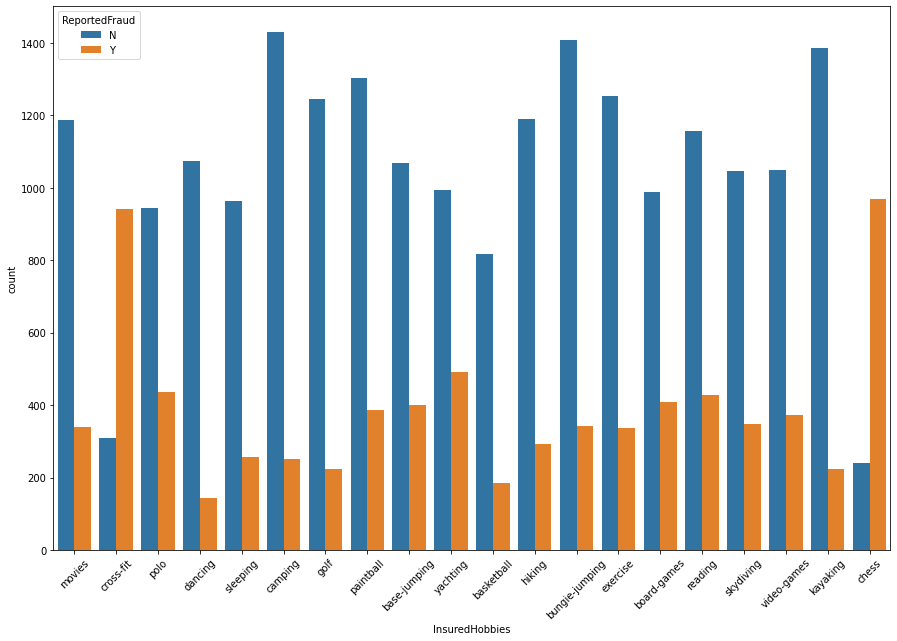

In [ ]:
plt.figure(figsize = (15,10))
plt.xticks(rotation=45)
sns.countplot(x = 'InsuredHobbies', hue = 'ReportedFraud', data = df)

One thing which is striking in this graph is that people with chess and cross-fit as hobby have extremely high number of fraudulent claims.

We will keep them and rename other values as 'other'.

In [ ]:
#binning all type of hobbies to 'others' except chess and crossfit because we have observed more frauds in chess and crossfit only.
df['InsuredHobbies'] = df['InsuredHobbies'].apply(lambda x : 'others' if x not in ['chess','cross-fit'] else x)
df_test['InsuredHobbies'] = df_test['InsuredHobbies'].apply(lambda x : 'others' if x not in ['chess','cross-fit'] else x)

Check outliers by using boxplot

<Axes: xlabel='UmbrellaLimit'>

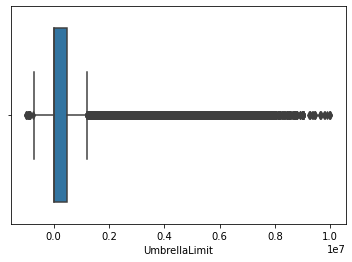

In [ ]:
sns.boxplot(x = df['UmbrellaLimit'])

<Axes: xlabel='AmountOfTotalClaim'>

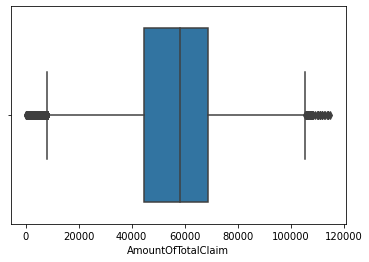

In [ ]:
sns.boxplot(x = df['AmountOfTotalClaim'])

InsuredAge vs ReportedFraud

<Axes: xlabel='InsuredAge', ylabel='count'>

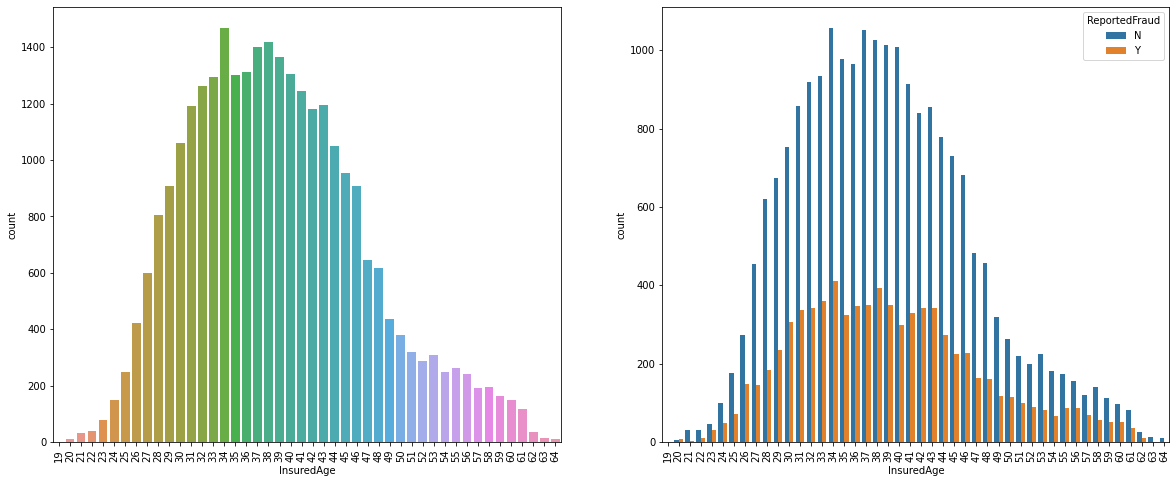

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.countplot(x = 'InsuredAge', data = df)
plt.subplot(1,2,2)
plt.xticks(rotation=90)
sns.countplot(x = 'InsuredAge', hue = 'ReportedFraud', data = df)


I observed, People in the age group between 30-45 have more number of frauds



## Data Pre-processing

##### Drop column(s) which are not significant

In [ ]:
df.drop(['CustomerID', 'InsurancePolicyNumber', 'VehicleID','Country'], axis = 1, inplace = True)
df_test.drop(['CustomerID', 'InsurancePolicyNumber','VehicleID', 'Country'], axis = 1, inplace = True)

##### Check for top 5 rows

In [ ]:
df.head()

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,DateOfPolicyCoverage,...,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleMake,VehicleModel,VehicleYOM,ReportedFraud
0,35,454776,MALE,JD,armed-forces,others,56700,-48500,49,1998-10-25,...,0.0,NaN,65501.0,13417,6071,46013,Audi,A5,2008,N
1,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,114,2000-11-15,...,1.0,YES,61382.0,15560,5919,39903,Audi,A5,2006,N
2,33,603260,MALE,JD,armed-forces,others,66400,-63700,167,2001-02-12,...,3.0,NO,66755.0,11630,11630,43495,Volkswagen,Jetta,1999,N
3,36,474848,MALE,JD,armed-forces,others,47900,-73400,190,2005-04-11,...,3.0,NO,66243.0,12003,12003,42237,Volkswagen,Jetta,2003,N
4,29,457942,FEMALE,High School,exec-managerial,others,0,-41500,115,1996-10-25,...,1.0,YES,53544.0,8829,7234,37481,Toyota,CRV,2010,N


In [ ]:
df_test.head()

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,DateOfPolicyCoverage,...,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,VehicleMake,VehicleModel,VehicleYOM
0,27,471704,FEMALE,High School,adm-clerical,others,56400,-57000,84,1998-05-10,...,0,0.0,NaN,68354.0,6835,8059,53460,Volkswagen,Passat,1995
1,40,455810,FEMALE,MD,prof-specialty,others,56700,-65600,232,2011-11-10,...,1,1.0,NaN,55270.0,8113,5240,41917,Nissan,Ultima,2006
2,39,461919,MALE,JD,other-service,others,30400,0,218,2010-07-17,...,0,1.0,NaN,59515.0,7490,9110,42915,Suburu,Impreza,2010
3,38,600904,FEMALE,Masters,exec-managerial,others,68500,0,205,2000-09-10,...,2,1.0,NaN,4941.0,494,866,3581,Accura,TL,2009
4,29,430632,FEMALE,PhD,sales,others,35100,0,134,2000-09-06,...,2,3.0,NO,34650.0,7700,3850,23100,Dodge,RAM,2007


##### Identify the Categorical Columns and store them in a variable cat_cols and numerical into num_cols

####create new columns by using date columns

In [ ]:
#split the date columns into year,month and day
df['policycoverageyear'] = df['DateOfPolicyCoverage'].str.split('-').str[0]
df['policycoveragemonth'] = df['DateOfPolicyCoverage'].str.split('-').str[1]
df['policycoveragedate'] = df['DateOfPolicyCoverage'].str.split('-').str[2]

df['incident_year'] = df['DateOfIncident'].str.split('-').str[0]
df['incident_month'] = df['DateOfIncident'].str.split('-').str[1]
df['incident_date'] = df['DateOfIncident'].str.split('-').str[2]

In [ ]:
#split for test_data date columns
df_test['policycoverageyear'] = df_test['DateOfPolicyCoverage'].str.split('-').str[0]
df_test['policycoveragemonth'] = df_test['DateOfPolicyCoverage'].str.split('-').str[1]
df_test['policycoveragedate'] = df_test['DateOfPolicyCoverage'].str.split('-').str[2]

df_test['incident_year'] = df_test['DateOfIncident'].str.split('-').str[0]
df_test['incident_month'] = df_test['DateOfIncident'].str.split('-').str[1]
df_test['incident_date'] = df_test['DateOfIncident'].str.split('-').str[2]

In [ ]:
df['singlelimit'] = df['Policy_CombinedSingleLimit'].str.split('/').str[0]
df['combinelimit'] = df['Policy_CombinedSingleLimit'].str.split('/').str[1]

In [ ]:
df_test['singlelimit'] = df_test['Policy_CombinedSingleLimit'].str.split('/').str[0]
df_test['combinelimit'] = df_test['Policy_CombinedSingleLimit'].str.split('/').str[1]

feature engineering:

to create new columns for easily understsandig

In [ ]:
#car lifetime = incidetyear - vehicleyom
df['vehicle_lifetime'] = df['incident_year'].apply(int) - df['VehicleYOM'].apply(int)
df['state_city'] = df['IncidentState'] + df['IncidentCity']

In [ ]:
df_test['vehicle_lifetime'] = df_test['incident_year'].apply(int) - df_test['VehicleYOM'].apply(int)
df_test['state_city'] = df_test['IncidentState'] + df_test['IncidentCity']

In [ ]:
df['netamount'] = df['CapitalGains'] + df['CapitalLoss']

In [ ]:
df_test['netamount'] = df_test['CapitalGains'] + df_test['CapitalLoss']

<Axes: xlabel='vehicle_lifetime', ylabel='count'>

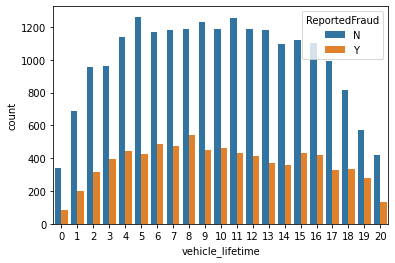

In [ ]:
sns.countplot(x = 'vehicle_lifetime', hue = 'ReportedFraud', data = df)

<Axes: xlabel='TypeOfCollission', ylabel='vehicle_lifetime'>

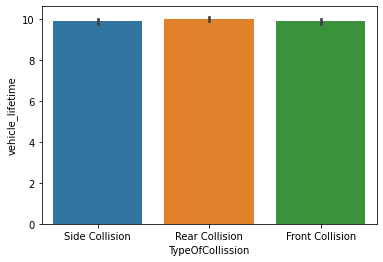

In [ ]:
sns.barplot(x = 'TypeOfCollission', y = 'vehicle_lifetime', data = df)

In [ ]:
df

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,DateOfPolicyCoverage,...,policycoveragemonth,policycoveragedate,incident_year,incident_month,incident_date,singlelimit,combinelimit,vehicle_lifetime,state_city,netamount
0,35,454776,MALE,JD,armed-forces,others,56700,-48500,49,1998-10-25,...,10,25,2015,02,03,100,300,7,State7City1,8200
1,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,114,2000-11-15,...,11,15,2015,02,02,100,300,9,State7City5,22100
2,33,603260,MALE,JD,armed-forces,others,66400,-63700,167,2001-02-12,...,02,12,2015,01,15,500,1000,16,State8City6,2700
3,36,474848,MALE,JD,armed-forces,others,47900,-73400,190,2005-04-11,...,04,11,2015,01,19,500,1000,12,State9City6,-25500
4,29,457942,FEMALE,High School,exec-managerial,others,0,-41500,115,1996-10-25,...,10,25,2015,01,09,100,300,5,State8City6,-41500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,46,600561,MALE,Masters,protective-serv,others,0,0,321,1998-04-18,...,04,18,2015,01,24,500,1000,8,State9City4,0
28832,44,439304,MALE,Masters,adm-clerical,others,0,-28800,237,2004-09-07,...,09,07,2015,02,09,100,300,12,State8City3,-28800
28833,53,460722,MALE,PhD,transport-moving,others,63100,-43800,392,1998-09-10,...,09,10,2015,01,28,250,500,11,State9City7,19300
28834,53,472634,MALE,Associate,transport-moving,others,67400,-43800,391,1998-08-10,...,08,10,2015,01,28,250,500,11,State9City3,23600


In [ ]:
df.dtypes

InsuredAge                      int64
InsuredZipCode                  int64
InsuredGender                  object
InsuredEducationLevel          object
InsuredOccupation              object
InsuredHobbies                 object
CapitalGains                    int64
CapitalLoss                     int64
CustomerLoyaltyPeriod           int64
DateOfPolicyCoverage           object
InsurancePolicyState           object
Policy_CombinedSingleLimit     object
Policy_Deductible               int64
PolicyAnnualPremium           float64
UmbrellaLimit                   int64
InsuredRelationship            object
DateOfIncident                 object
TypeOfIncident                 object
TypeOfCollission               object
SeverityOfIncident             object
AuthoritiesContacted           object
IncidentState                  object
IncidentCity                   object
IncidentAddress                object
IncidentTime                  float64
NumberOfVehicles                int64
PropertyDama

In [ ]:
df.shape

(28836, 49)

<Axes: xlabel='IncidentTime', ylabel='count'>

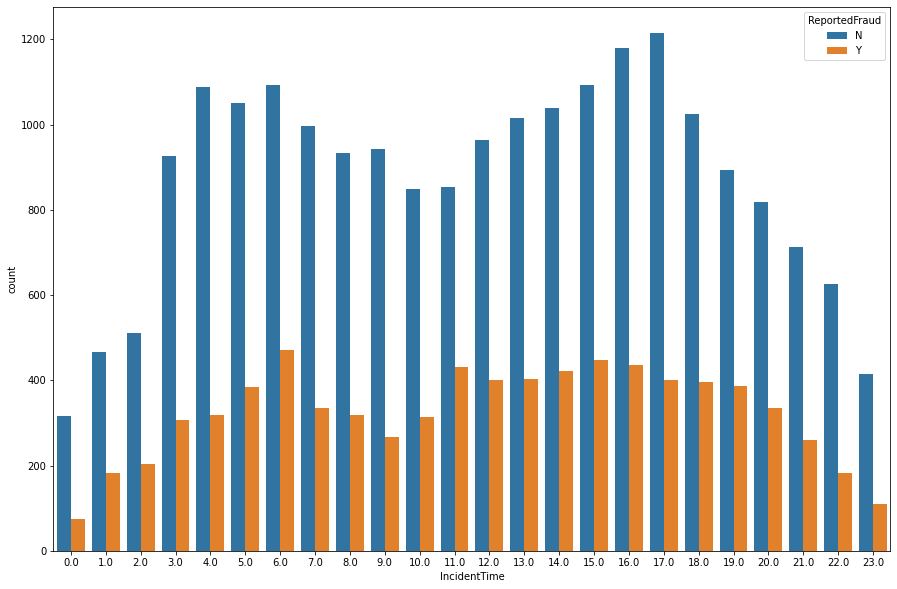

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'IncidentTime', hue = 'ReportedFraud', data = df)

In [ ]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df['IncidentTimeperiod'] = pd.cut(df.IncidentTime, bins, labels=names).astype(object)

In [ ]:
bins = [-1, 3, 6, 9, 12, 17, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
df_test['IncidentTimeperiod'] = pd.cut(df_test.IncidentTime, bins, labels=names).astype(object)

In [ ]:
df[['policycoverageyear','incident_date','policycoveragedate','singlelimit','combinelimit']] = df[['policycoverageyear','incident_date','policycoveragedate','singlelimit','combinelimit']].astype(str).astype(int)

In [ ]:
df_test[['policycoverageyear','incident_date','policycoveragedate','singlelimit','combinelimit']] = df_test[['policycoverageyear','incident_date','policycoveragedate','singlelimit','combinelimit']].astype(str).astype(int)

remove outliers

In [ ]:
pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from feature_engine.outliers import Winsorizer

In [ ]:
wc = Winsorizer(capping_method = 'quantiles', fold = 0.05, tail = 'both')
w = wc.fit_transform(df[['UmbrellaLimit']])

In [ ]:
df['UmbrellaLimit'] = w

<Axes: xlabel='UmbrellaLimit'>

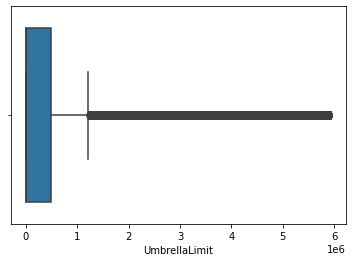

In [ ]:
sns.boxplot(x = df['UmbrellaLimit'])

In [ ]:
num_col = ['InsuredAge', 'netamount','Policy_Deductible','PolicyAnnualPremium','singlelimit','combinelimit', 'UmbrellaLimit', 'NumberOfVehicles','BodilyInjuries', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim','AmountOfVehicleDamage','vehicle_lifetime','policycoverageyear','incident_date','policycoveragedate']

In [ ]:
num_col

['InsuredAge',
 'netamount',
 'Policy_Deductible',
 'PolicyAnnualPremium',
 'singlelimit',
 'combinelimit',
 'UmbrellaLimit',
 'NumberOfVehicles',
 'BodilyInjuries',
 'AmountOfInjuryClaim',
 'AmountOfPropertyClaim',
 'AmountOfVehicleDamage',
 'vehicle_lifetime',
 'policycoverageyear',
 'incident_date',
 'policycoveragedate']

Drop the duplicate columns and un useful columns

In [ ]:
df.drop(['DateOfIncident','DateOfPolicyCoverage','incident_year','CapitalGains','CapitalLoss','VehicleYOM','Policy_CombinedSingleLimit','IncidentTime','IncidentState','IncidentCity','IncidentAddress'], axis = 1, inplace = True)

In [ ]:
df_test.drop(['DateOfIncident','DateOfPolicyCoverage','incident_year','CapitalGains','CapitalLoss','VehicleYOM','Policy_CombinedSingleLimit','IncidentTime','IncidentState','IncidentCity','IncidentAddress'], axis = 1, inplace = True)

in our data Insuredzipcode is given numerical type.But, it is categorical datatype. so, change the data type (int to object)

In [ ]:
#in our data Insuredzipcode is given numerical type.But, it is categorical datatype. so, change the data type (int to object)
df['InsuredZipCode'] = df['InsuredZipCode'].astype(object)
df_test['InsuredZipCode'] = df_test['InsuredZipCode'].astype(object)

Visulaize the missing value 

<function matplotlib.pyplot.show(close=None, block=None)>

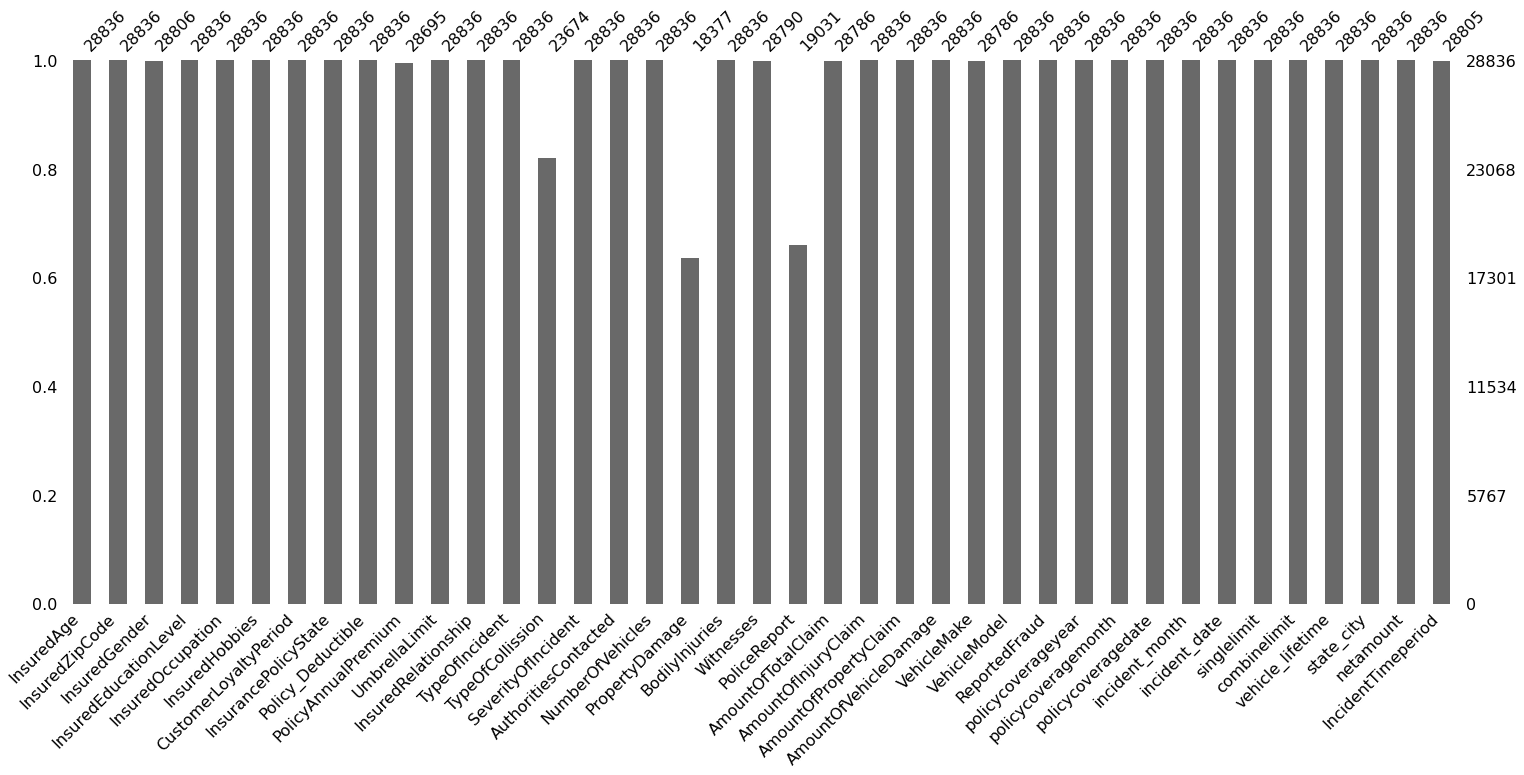

In [ ]:
import missingno as msno

msno.bar(df)
plt.show

# Imputation:

Simple Imputer for below 5% of columns

In [ ]:
df['InsuredGender'].groupby(df['InsuredGender']).count()

InsuredGender
FEMALE    15644
MALE      13162
Name: InsuredGender, dtype: int64

In [ ]:
df['InsuredGender'].fillna('FEMALE', inplace = True)

In [ ]:
df_test['InsuredGender'].groupby(df_test['InsuredGender']).count()

InsuredGender
FEMALE    4840
MALE      4064
Name: InsuredGender, dtype: int64

In [ ]:
df_test['InsuredGender'].fillna('FEMALE', inplace = True)

fill null values in Incidenttimeperiod to use fillna

In [ ]:
df['IncidentTimeperiod'].groupby(df['IncidentTimeperiod']).count()

IncidentTimeperiod
afternoon        7653
early_morning    4404
evening          3852
fore-noon        3814
morning          3792
night            2306
past_midnight    2984
Name: IncidentTimeperiod, dtype: int64

In [ ]:
df['IncidentTimeperiod'].fillna('afternoon', inplace = True)

In [ ]:
df_test['IncidentTimeperiod'].groupby(df_test['IncidentTimeperiod']).count()

IncidentTimeperiod
afternoon        2315
early_morning    1385
evening          1175
fore-noon        1163
morning          1242
night             744
past_midnight     881
Name: IncidentTimeperiod, dtype: int64

In [ ]:
df_test['IncidentTimeperiod'].fillna('afternoon', inplace = True)

To fill null values in witness by using fillna

In [ ]:
df['Witnesses'].groupby(df['Witnesses']).count()                       

Witnesses
0.0    6128
1.0    8345
2.0    8449
3.0    5868
Name: Witnesses, dtype: int64

In [ ]:
df['Witnesses'].fillna(2, inplace = True)

In [ ]:
df_test['Witnesses'].groupby(df_test['Witnesses']).count()

Witnesses
0.0    1886
1.0    2605
2.0    2534
3.0    1875
Name: Witnesses, dtype: int64

In [ ]:
df_test['Witnesses'].fillna(2, inplace = True)

In [ ]:
df['VehicleMake'].groupby(df['VehicleMake']).count()

VehicleMake
Accura        2099
Audi          1952
BMW           2073
Chevrolet     2174
Dodge         2263
Ford          2158
Honda         1493
Jeep          1946
Mercedes      1659
Nissan        2300
Saab          2415
Suburu        2313
Toyota        1981
Volkswagen    1960
Name: VehicleMake, dtype: int64

In [ ]:
df['VehicleMake'].fillna('Saab', inplace = True)

In [ ]:
df_test['VehicleMake'].groupby(df_test['VehicleMake']).count()

VehicleMake
Accura        626
Audi          587
BMW           595
Chevrolet     718
Dodge         706
Ford          612
Honda         442
Jeep          725
Mercedes      478
Nissan        741
Saab          714
Suburu        743
Toyota        590
Volkswagen    627
Name: VehicleMake, dtype: int64

In [ ]:
df_test['VehicleMake'].fillna('Saab', inplace = True)

i observe above data is in distribution  

<Axes: xlabel='PolicyAnnualPremium', ylabel='Count'>

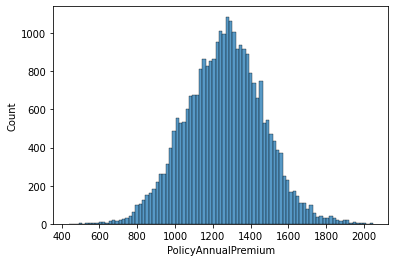

In [ ]:
sns.histplot(x = df['PolicyAnnualPremium'])

In [ ]:
df['PolicyAnnualPremium'].mean()

1261.7026461055932

In [ ]:
df['PolicyAnnualPremium'].fillna(1261.70, inplace = True)

In [ ]:
df_test['PolicyAnnualPremium'].mean()

1260.235059221658

In [ ]:
df_test['PolicyAnnualPremium'].fillna(1260.23, inplace = True)

<Axes: xlabel='AmountOfTotalClaim', ylabel='Count'>

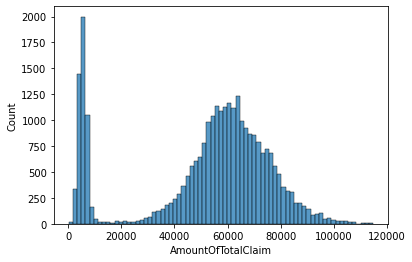

In [ ]:
sns.histplot(x = df['AmountOfTotalClaim'])

In [ ]:
df['AmountOfTotalClaim'] = df['AmountOfInjuryClaim'] + df['AmountOfPropertyClaim'] + df['AmountOfVehicleDamage']

In [ ]:
df_test['AmountOfTotalClaim'] = df_test['AmountOfInjuryClaim'] + df_test['AmountOfPropertyClaim'] + df_test['AmountOfVehicleDamage'] 

In [ ]:
df.isna().sum()

InsuredAge                   0
InsuredZipCode               0
InsuredGender                0
InsuredEducationLevel        0
InsuredOccupation            0
InsuredHobbies               0
CustomerLoyaltyPeriod        0
InsurancePolicyState         0
Policy_Deductible            0
PolicyAnnualPremium          0
UmbrellaLimit                0
InsuredRelationship          0
TypeOfIncident               0
TypeOfCollission          5162
SeverityOfIncident           0
AuthoritiesContacted         0
NumberOfVehicles             0
PropertyDamage           10459
BodilyInjuries               0
Witnesses                    0
PoliceReport              9805
AmountOfTotalClaim           0
AmountOfInjuryClaim          0
AmountOfPropertyClaim        0
AmountOfVehicleDamage        0
VehicleMake                  0
VehicleModel                 0
ReportedFraud                0
policycoverageyear           0
policycoveragemonth          0
policycoveragedate           0
incident_month               0
incident

In [ ]:
numeric = df[['InsuredAge', 'netamount','Policy_Deductible','PolicyAnnualPremium','CustomerLoyaltyPeriod','singlelimit','combinelimit', 'UmbrellaLimit', 'NumberOfVehicles','BodilyInjuries', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim','AmountOfTotalClaim','AmountOfVehicleDamage','vehicle_lifetime','policycoverageyear','incident_date','policycoveragedate']]

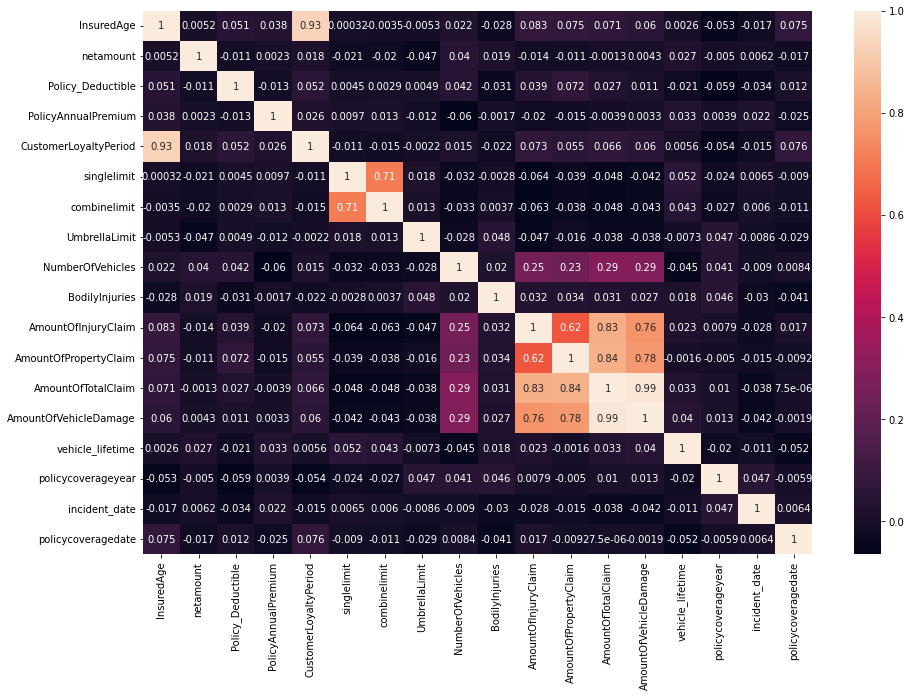

In [ ]:
plt.figure(figsize = (15,10))
cor = numeric.corr()
sns.heatmap(data = cor, annot = True)
plt.show()

In [ ]:
df.drop(['CustomerLoyaltyPeriod','AmountOfTotalClaim'], axis = 1, inplace = True)
df_test.drop(['CustomerLoyaltyPeriod','AmountOfTotalClaim'], axis=1, inplace = True)

#### Replace the values

In [ ]:
#Replace the values male:0, female :1 and no : 0, yes : 1
df['InsuredGender'].replace({"MALE": 0, "FEMALE": 1}, inplace=True)
df['PropertyDamage'].replace({"NO": 0, "YES": 1}, inplace=True)
df['PoliceReport'].replace({"NO": 0, "YES": 1}, inplace=True)

In [ ]:
#replace the values for test data
df_test['InsuredGender'].replace({"MALE": 0, "FEMALE": 1}, inplace=True)
df_test['PropertyDamage'].replace({"NO": 0, "YES": 1}, inplace=True)
df_test['PoliceReport'].replace({"NO": 0, "YES": 1}, inplace=True)

In [ ]:
#df['InsuredGender', 'PropertyDamage','PoliceReport'] = df['InsuredGender', 'PropertyDamage','PoliceReport'].astype(int64)

#### Label encoding for our target variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ReportedFraud'] = le.fit_transform(df['ReportedFraud'])

In [ ]:
df

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,InsurancePolicyState,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,...,policycoveragemonth,policycoveragedate,incident_month,incident_date,singlelimit,combinelimit,vehicle_lifetime,state_city,netamount,IncidentTimeperiod
0,35,454776,0,JD,armed-forces,others,State1,1000,1632.73,0.0,...,10,25,02,3,100,300,7,State7City1,8200,afternoon
1,36,454776,0,JD,tech-support,cross-fit,State1,1000,1255.19,0.0,...,11,15,02,2,100,300,9,State7City5,22100,fore-noon
2,33,603260,0,JD,armed-forces,others,State3,617,1373.38,0.0,...,02,12,01,15,500,1000,16,State8City6,2700,night
3,36,474848,0,JD,armed-forces,others,State2,722,1337.60,0.0,...,04,11,01,19,500,1000,12,State9City6,-25500,night
4,29,457942,1,High School,exec-managerial,others,State2,500,1353.73,4279863.0,...,10,25,01,9,100,300,5,State8City6,-41500,fore-noon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,46,600561,0,Masters,protective-serv,others,State1,655,1276.01,0.0,...,04,18,01,24,500,1000,8,State9City4,0,past_midnight
28832,44,439304,0,Masters,adm-clerical,others,State2,1089,1273.38,0.0,...,09,7,02,9,100,300,12,State8City3,-28800,afternoon
28833,53,460722,0,PhD,transport-moving,others,State3,787,1380.92,3448735.0,...,09,10,01,28,250,500,11,State9City7,19300,past_midnight
28834,53,472634,0,Associate,transport-moving,others,State3,780,1389.29,3364301.0,...,08,10,01,28,250,500,11,State9City3,23600,past_midnight


#### Ordinal Encoding

It is used to convert categorical variables with ordered or hierarchical values into numerical values. In ordinal encoding, each unique category is assigned a unique integer value based on its order or hierarchy in the dataset.

In [ ]:
#ordinal encoding for 'insurededucationlevel' and 'severity of incident' columns
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories = [['High School','Associate','College','Masters','JD','MD','PhD']])
ode = oe.fit_transform(df['InsuredEducationLevel'].values.reshape(-1,1))
oe1 = OrdinalEncoder(categories = [['Trivial Damage','Minor Damage','Major Damage','Total Loss']])
ode1 = oe1.fit_transform(df['SeverityOfIncident'].values.reshape(-1,1))

In [ ]:
# create data frame for above two columns 
df['InsuredEducationLevel'] = pd.DataFrame(data = ode, columns = ['InsuredEducationLevel']).astype(int)
df['SeverityOfIncident'] = pd.DataFrame(data = ode1, columns = ['SeverityOfIncident']).astype(int)

In [ ]:
df

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,InsurancePolicyState,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,...,policycoveragemonth,policycoveragedate,incident_month,incident_date,singlelimit,combinelimit,vehicle_lifetime,state_city,netamount,IncidentTimeperiod
0,35,454776,0,4,armed-forces,others,State1,1000,1632.73,0.0,...,10,25,02,3,100,300,7,State7City1,8200,afternoon
1,36,454776,0,4,tech-support,cross-fit,State1,1000,1255.19,0.0,...,11,15,02,2,100,300,9,State7City5,22100,fore-noon
2,33,603260,0,4,armed-forces,others,State3,617,1373.38,0.0,...,02,12,01,15,500,1000,16,State8City6,2700,night
3,36,474848,0,4,armed-forces,others,State2,722,1337.60,0.0,...,04,11,01,19,500,1000,12,State9City6,-25500,night
4,29,457942,1,0,exec-managerial,others,State2,500,1353.73,4279863.0,...,10,25,01,9,100,300,5,State8City6,-41500,fore-noon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,46,600561,0,3,protective-serv,others,State1,655,1276.01,0.0,...,04,18,01,24,500,1000,8,State9City4,0,past_midnight
28832,44,439304,0,3,adm-clerical,others,State2,1089,1273.38,0.0,...,09,7,02,9,100,300,12,State8City3,-28800,afternoon
28833,53,460722,0,6,transport-moving,others,State3,787,1380.92,3448735.0,...,09,10,01,28,250,500,11,State9City7,19300,past_midnight
28834,53,472634,0,1,transport-moving,others,State3,780,1389.29,3364301.0,...,08,10,01,28,250,500,11,State9City3,23600,past_midnight


In [ ]:
#Ordinal encoding for test
from sklearn.preprocessing import OrdinalEncoder
oe_1 = OrdinalEncoder(categories = [['High School','Associate','College','Masters','JD','MD','PhD']])
ode_1 = oe_1.fit_transform(df_test['InsuredEducationLevel'].values.reshape(-1,1))
ord = OrdinalEncoder(categories = [['Trivial Damage','Minor Damage','Major Damage','Total Loss']])
ord1 = ord.fit_transform(df_test['SeverityOfIncident'].values.reshape(-1,1))

In [ ]:
df_test['InsuredEducationLevel'] = pd.DataFrame(data = ode_1, columns = ['InsuredEducationLevel']).astype(int)
df_test['SeverityOfIncident'] = pd.DataFrame(data = ord1, columns = ['SeverityOfIncident']).astype(int)

In [ ]:
df.columns

Index(['InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'InsurancePolicyState', 'Policy_Deductible', 'PolicyAnnualPremium',
       'UmbrellaLimit', 'InsuredRelationship', 'TypeOfIncident',
       'TypeOfCollission', 'SeverityOfIncident', 'AuthoritiesContacted',
       'NumberOfVehicles', 'PropertyDamage', 'BodilyInjuries', 'Witnesses',
       'PoliceReport', 'AmountOfInjuryClaim', 'AmountOfPropertyClaim',
       'AmountOfVehicleDamage', 'VehicleMake', 'VehicleModel', 'ReportedFraud',
       'policycoverageyear', 'policycoveragemonth', 'policycoveragedate',
       'incident_month', 'incident_date', 'singlelimit', 'combinelimit',
       'vehicle_lifetime', 'state_city', 'netamount', 'IncidentTimeperiod'],
      dtype='object')

In [ ]:
#replace the null_values with No collision, because the null value records are either 'parkedcar' or 'vehiclethieft', so we replace no collision
df["TypeOfCollission"].replace({np.nan:'No collission'},inplace=True)
df["TypeOfCollission"]

0         Side Collision
1         Side Collision
2         Side Collision
3         Side Collision
4         Rear Collision
              ...       
28831      No collission
28832    Front Collision
28833     Rear Collision
28834     Rear Collision
28835    Front Collision
Name: TypeOfCollission, Length: 28836, dtype: object

In [ ]:
df['TypeOfCollission'].value_counts()

Rear Collision     8561
Side Collision     7867
Front Collision    7246
No collission      5162
Name: TypeOfCollission, dtype: int64

In [ ]:
df_test["TypeOfCollission"].replace({np.nan:'No collission'},inplace=True)
df_test["TypeOfCollission"]

0       Front Collision
1        Rear Collision
2        Rear Collision
3         No collission
4        Rear Collision
             ...       
8907      No collission
8908     Rear Collision
8909     Side Collision
8910    Front Collision
8911    Front Collision
Name: TypeOfCollission, Length: 8912, dtype: object

In [ ]:
df_test['TypeOfCollission'].value_counts()

Rear Collision     2602
Side Collision     2388
Front Collision    2159
No collission      1763
Name: TypeOfCollission, dtype: int64

In [ ]:
df.isna().sum()

InsuredAge                   0
InsuredZipCode               0
InsuredGender                0
InsuredEducationLevel        0
InsuredOccupation            0
InsuredHobbies               0
InsurancePolicyState         0
Policy_Deductible            0
PolicyAnnualPremium          0
UmbrellaLimit                0
InsuredRelationship          0
TypeOfIncident               0
TypeOfCollission             0
SeverityOfIncident           0
AuthoritiesContacted         0
NumberOfVehicles             0
PropertyDamage           10459
BodilyInjuries               0
Witnesses                    0
PoliceReport              9805
AmountOfInjuryClaim          0
AmountOfPropertyClaim        0
AmountOfVehicleDamage        0
VehicleMake                  0
VehicleModel                 0
ReportedFraud                0
policycoverageyear           0
policycoveragemonth          0
policycoveragedate           0
incident_month               0
incident_date                0
singlelimit                  0
combinel

In [ ]:
df

,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,InsurancePolicyState,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,...,policycoveragemonth,policycoveragedate,incident_month,incident_date,singlelimit,combinelimit,vehicle_lifetime,state_city,netamount,IncidentTimeperiod
0,35,454776,0,4,armed-forces,others,State1,1000,1632.73,0.0,...,10,25,02,3,100,300,7,State7City1,8200,afternoon
1,36,454776,0,4,tech-support,cross-fit,State1,1000,1255.19,0.0,...,11,15,02,2,100,300,9,State7City5,22100,fore-noon
2,33,603260,0,4,armed-forces,others,State3,617,1373.38,0.0,...,02,12,01,15,500,1000,16,State8City6,2700,night
3,36,474848,0,4,armed-forces,others,State2,722,1337.60,0.0,...,04,11,01,19,500,1000,12,State9City6,-25500,night
4,29,457942,1,0,exec-managerial,others,State2,500,1353.73,4279863.0,...,10,25,01,9,100,300,5,State8City6,-41500,fore-noon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,46,600561,0,3,protective-serv,others,State1,655,1276.01,0.0,...,04,18,01,24,500,1000,8,State9City4,0,past_midnight
28832,44,439304,0,3,adm-clerical,others,State2,1089,1273.38,0.0,...,09,7,02,9,100,300,12,State8City3,-28800,afternoon
28833,53,460722,0,6,transport-moving,others,State3,787,1380.92,3448735.0,...,09,10,01,28,250,500,11,State9City7,19300,past_midnight
28834,53,472634,0,1,transport-moving,others,State3,780,1389.29,3364301.0,...,08,10,01,28,250,500,11,State9City3,23600,past_midnight


#### KNN imputation

knn imputation for more null value columns

In [ ]:
# seperate the target column for purpose of knn imputation, it is used only for independent features
knn_x = df.drop(['ReportedFraud','InsuredZipCode'], axis = 1)
knn_y = df[['ReportedFraud','InsuredZipCode']]

In [ ]:
knn_x.dtypes

InsuredAge                 int64
InsuredGender              int64
InsuredEducationLevel      int64
InsuredOccupation         object
InsuredHobbies            object
InsurancePolicyState      object
Policy_Deductible          int64
PolicyAnnualPremium      float64
UmbrellaLimit            float64
InsuredRelationship       object
TypeOfIncident            object
TypeOfCollission          object
SeverityOfIncident         int64
AuthoritiesContacted      object
NumberOfVehicles           int64
PropertyDamage           float64
BodilyInjuries             int64
Witnesses                float64
PoliceReport             float64
AmountOfInjuryClaim        int64
AmountOfPropertyClaim      int64
AmountOfVehicleDamage      int64
VehicleMake               object
VehicleModel              object
policycoverageyear         int64
policycoveragemonth       object
policycoveragedate         int64
incident_month            object
incident_date              int64
singlelimit                int64
combinelim

In [ ]:
num = knn_x.select_dtypes(['int64','float64'])
cat = knn_x.select_dtypes(['object'])
cat = cat.astype('category')
cat

,InsuredOccupation,InsuredHobbies,InsurancePolicyState,InsuredRelationship,TypeOfIncident,TypeOfCollission,AuthoritiesContacted,VehicleMake,VehicleModel,policycoveragemonth,incident_month,state_city,IncidentTimeperiod
0,armed-forces,others,State1,not-in-family,Multi-vehicle Collision,Side Collision,Police,Audi,A5,10,02,State7City1,afternoon
1,tech-support,cross-fit,State1,not-in-family,Multi-vehicle Collision,Side Collision,Police,Audi,A5,11,02,State7City5,fore-noon
2,armed-forces,others,State3,wife,Single Vehicle Collision,Side Collision,Other,Volkswagen,Jetta,02,01,State8City6,night
3,armed-forces,others,State2,own-child,Single Vehicle Collision,Side Collision,Other,Volkswagen,Jetta,04,01,State9City6,night
4,exec-managerial,others,State2,unmarried,Single Vehicle Collision,Rear Collision,Fire,Toyota,CRV,10,01,State8City6,fore-noon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,protective-serv,others,State1,unmarried,Vehicle Theft,No collission,Police,Suburu,Impreza,04,01,State9City4,past_midnight
28832,adm-clerical,others,State2,unmarried,Single Vehicle Collision,Front Collision,Fire,Jeep,Wrangler,09,02,State8City3,afternoon
28833,transport-moving,others,State3,own-child,Single Vehicle Collision,Rear Collision,Fire,Suburu,Legacy,09,01,State9City7,past_midnight
28834,transport-moving,others,State3,not-in-family,Single Vehicle Collision,Rear Collision,Ambulance,Suburu,Forrestor,08,01,State9City3,past_midnight


In [ ]:
numy = knn_y.select_dtypes(['int64','float64'])
caty = knn_y.select_dtypes(['object'])
caty = caty.astype('category')
caty

,InsuredZipCode
0,454776
1,454776
2,603260
3,474848
4,457942
...,...
28831,600561
28832,439304
28833,460722
28834,472634


### Encoding Categorical to Numeric -  One Hot Encoding

 In one hot encoding, each unique category in a categorical variable is transformed into a binary vector with a length equal to the number of categories. The vector contains 1 in the position corresponding to the category and 0 in all other positions.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')
encoder1 = OneHotEncoder(sparse = False, handle_unknown='ignore')

enc = encoder.fit_transform(cat)
enc1 = encoder1.fit_transform(caty)
cat = pd.DataFrame(enc,columns=encoder.get_feature_names_out())
caty = pd.DataFrame(enc1,columns=encoder1.get_feature_names_out())


In [ ]:
cat

,InsuredOccupation_adm-clerical,InsuredOccupation_armed-forces,InsuredOccupation_craft-repair,InsuredOccupation_exec-managerial,InsuredOccupation_farming-fishing,InsuredOccupation_handlers-cleaners,InsuredOccupation_machine-op-inspct,InsuredOccupation_other-service,InsuredOccupation_priv-house-serv,InsuredOccupation_prof-specialty,...,state_city_State9City5,state_city_State9City6,state_city_State9City7,IncidentTimeperiod_afternoon,IncidentTimeperiod_early_morning,IncidentTimeperiod_evening,IncidentTimeperiod_fore-noon,IncidentTimeperiod_morning,IncidentTimeperiod_night,IncidentTimeperiod_past_midnight
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28832,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
caty

,InsuredZipCode_430104,InsuredZipCode_430141,InsuredZipCode_430232,InsuredZipCode_430380,InsuredZipCode_430567,InsuredZipCode_430621,InsuredZipCode_430632,InsuredZipCode_430665,InsuredZipCode_430714,InsuredZipCode_430832,...,InsuredZipCode_620207,InsuredZipCode_620358,InsuredZipCode_620473,InsuredZipCode_620493,InsuredZipCode_620507,InsuredZipCode_620737,InsuredZipCode_620757,InsuredZipCode_620819,InsuredZipCode_620869,InsuredZipCode_620962
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
knn_y = pd.concat([numy,caty], axis =1)
knn_y

,ReportedFraud,InsuredZipCode_430104,InsuredZipCode_430141,InsuredZipCode_430232,InsuredZipCode_430380,InsuredZipCode_430567,InsuredZipCode_430621,InsuredZipCode_430632,InsuredZipCode_430665,InsuredZipCode_430714,...,InsuredZipCode_620207,InsuredZipCode_620358,InsuredZipCode_620473,InsuredZipCode_620493,InsuredZipCode_620507,InsuredZipCode_620737,InsuredZipCode_620757,InsuredZipCode_620819,InsuredZipCode_620869,InsuredZipCode_620962
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28832,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28833,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28834,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
num

,InsuredAge,InsuredGender,InsuredEducationLevel,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,SeverityOfIncident,NumberOfVehicles,PropertyDamage,BodilyInjuries,...,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,policycoverageyear,policycoveragedate,incident_date,singlelimit,combinelimit,vehicle_lifetime,netamount
0,35,0,4,1000,1632.73,0.0,3,3,NaN,1,...,13417,6071,46013,1998,25,3,100,300,7,8200
1,36,0,4,1000,1255.19,0.0,3,3,1.0,2,...,15560,5919,39903,2000,15,2,100,300,9,22100
2,33,0,4,617,1373.38,0.0,1,1,1.0,2,...,11630,11630,43495,2001,12,15,500,1000,16,2700
3,36,0,4,722,1337.60,0.0,1,1,1.0,2,...,12003,12003,42237,2005,11,19,500,1000,12,-25500
4,29,1,0,500,1353.73,4279863.0,1,1,0.0,2,...,8829,7234,37481,1996,25,9,100,300,5,-41500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,46,0,3,655,1276.01,0.0,0,1,0.0,0,...,870,1078,4642,1998,18,24,500,1000,8,0
28832,44,0,3,1089,1273.38,0.0,1,1,1.0,0,...,14699,7875,51973,2004,7,9,100,300,12,-28800
28833,53,0,6,787,1380.92,3448735.0,1,1,1.0,2,...,7043,7043,41219,1998,10,28,250,500,11,19300
28834,53,0,1,780,1389.29,3364301.0,1,1,NaN,2,...,7059,7059,41712,1998,10,28,250,500,11,23600


In [ ]:
#merge num columns and cat columns
total_df = pd.concat([num,cat], axis=1)
total_df

,InsuredAge,InsuredGender,InsuredEducationLevel,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,SeverityOfIncident,NumberOfVehicles,PropertyDamage,BodilyInjuries,...,state_city_State9City5,state_city_State9City6,state_city_State9City7,IncidentTimeperiod_afternoon,IncidentTimeperiod_early_morning,IncidentTimeperiod_evening,IncidentTimeperiod_fore-noon,IncidentTimeperiod_morning,IncidentTimeperiod_night,IncidentTimeperiod_past_midnight
0,35,0,4,1000,1632.73,0.0,3,3,NaN,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,0,4,1000,1255.19,0.0,3,3,1.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,33,0,4,617,1373.38,0.0,1,1,1.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36,0,4,722,1337.60,0.0,1,1,1.0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,29,1,0,500,1353.73,4279863.0,1,1,0.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,46,0,3,655,1276.01,0.0,0,1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28832,44,0,3,1089,1273.38,0.0,1,1,1.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
28833,53,0,6,787,1380.92,3448735.0,1,1,1.0,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
28834,53,0,1,780,1389.29,3364301.0,1,1,NaN,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# seperate the target column for purpose of knn imputation, it is used only for independent features
knn_x_test = df_test.drop(['InsuredZipCode'], axis = 1)
knn_y_test = df_test[['InsuredZipCode']]

In [ ]:
num_test = knn_x_test.select_dtypes(['int64','float64'])
cat_test = knn_x_test.select_dtypes(['object']).astype('category')

In [ ]:
numy_test = knn_y_test.select_dtypes(['int64','float64'])
caty_test = knn_y_test.select_dtypes(['object']).astype('category')

In [ ]:
num_test.columns

Index(['InsuredAge', 'InsuredGender', 'InsuredEducationLevel',
       'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit',
       'SeverityOfIncident', 'NumberOfVehicles', 'PropertyDamage',
       'BodilyInjuries', 'Witnesses', 'PoliceReport', 'AmountOfInjuryClaim',
       'AmountOfPropertyClaim', 'AmountOfVehicleDamage', 'policycoverageyear',
       'policycoveragedate', 'incident_date', 'singlelimit', 'combinelimit',
       'vehicle_lifetime', 'netamount'],
      dtype='object')

In [ ]:
cat_test.columns

Index(['InsuredOccupation', 'InsuredHobbies', 'InsurancePolicyState',
       'InsuredRelationship', 'TypeOfIncident', 'TypeOfCollission',
       'AuthoritiesContacted', 'VehicleMake', 'VehicleModel',
       'policycoveragemonth', 'incident_month', 'state_city',
       'IncidentTimeperiod'],
      dtype='object')

In [ ]:
cat_test

,InsuredOccupation,InsuredHobbies,InsurancePolicyState,InsuredRelationship,TypeOfIncident,TypeOfCollission,AuthoritiesContacted,VehicleMake,VehicleModel,policycoveragemonth,incident_month,state_city,IncidentTimeperiod
0,adm-clerical,others,State2,own-child,Multi-vehicle Collision,Front Collision,Ambulance,Volkswagen,Passat,05,02,State5City2,early_morning
1,prof-specialty,others,State3,unmarried,Single Vehicle Collision,Rear Collision,Fire,Nissan,Ultima,11,01,State9City5,afternoon
2,other-service,others,State2,other-relative,Multi-vehicle Collision,Rear Collision,Police,Suburu,Impreza,07,01,State5City2,evening
3,exec-managerial,others,State3,wife,Vehicle Theft,No collission,None,Accura,TL,09,01,State7City5,fore-noon
4,sales,others,State3,own-child,Multi-vehicle Collision,Rear Collision,Police,Dodge,RAM,09,02,State5City2,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,sales,others,State2,not-in-family,Multi-vehicle Collision,No collission,Police,Volkswagen,Jetta,02,01,State9City7,early_morning
8908,transport-moving,others,State3,husband,Multi-vehicle Collision,Rear Collision,Other,Nissan,Jetta,07,01,State9City1,morning
8909,adm-clerical,others,State1,wife,Multi-vehicle Collision,Side Collision,Ambulance,Volkswagen,Jetta,08,01,State8City3,early_morning
8910,transport-moving,others,State1,own-child,Single Vehicle Collision,Front Collision,Other,Volkswagen,Jetta,12,01,State7City4,evening


In [ ]:
caty_test

,InsuredZipCode
0,471704
1,455810
2,461919
3,600904
4,430632
...,...
8907,439690
8908,608982
8909,608525
8910,439360


In [ ]:
from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(sparse = False, handle_unknown='ignore')
oe_test=encoder.transform(cat_test)
oe_test1 = encoder1.transform(caty_test)
cat_test = pd.DataFrame( oe_test,columns=encoder.get_feature_names_out())
caty_test = pd.DataFrame( oe_test1,columns=encoder1.get_feature_names_out())

In [ ]:
cat_test

,InsuredOccupation_adm-clerical,InsuredOccupation_armed-forces,InsuredOccupation_craft-repair,InsuredOccupation_exec-managerial,InsuredOccupation_farming-fishing,InsuredOccupation_handlers-cleaners,InsuredOccupation_machine-op-inspct,InsuredOccupation_other-service,InsuredOccupation_priv-house-serv,InsuredOccupation_prof-specialty,...,state_city_State9City5,state_city_State9City6,state_city_State9City7,IncidentTimeperiod_afternoon,IncidentTimeperiod_early_morning,IncidentTimeperiod_evening,IncidentTimeperiod_fore-noon,IncidentTimeperiod_morning,IncidentTimeperiod_night,IncidentTimeperiod_past_midnight
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8909,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
caty_test

,InsuredZipCode_430104,InsuredZipCode_430141,InsuredZipCode_430232,InsuredZipCode_430380,InsuredZipCode_430567,InsuredZipCode_430621,InsuredZipCode_430632,InsuredZipCode_430665,InsuredZipCode_430714,InsuredZipCode_430832,...,InsuredZipCode_620207,InsuredZipCode_620358,InsuredZipCode_620473,InsuredZipCode_620493,InsuredZipCode_620507,InsuredZipCode_620737,InsuredZipCode_620757,InsuredZipCode_620819,InsuredZipCode_620869,InsuredZipCode_620962
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
num_test

,InsuredAge,InsuredGender,InsuredEducationLevel,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,SeverityOfIncident,NumberOfVehicles,PropertyDamage,BodilyInjuries,...,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,policycoverageyear,policycoveragedate,incident_date,singlelimit,combinelimit,vehicle_lifetime,netamount
0,27,1,0,2000,1006.00,0,1,3,0.0,0,...,6835,8059,53460,1998,10,5,500,1000,20,-600
1,40,1,5,500,1279.17,0,1,1,NaN,1,...,8113,5240,41917,2011,10,13,100,300,9,-8900
2,39,0,4,1000,1454.67,1235986,1,3,0.0,0,...,7490,9110,42915,2010,17,5,250,500,5,30400
3,38,1,3,2000,1287.76,5873212,0,1,NaN,2,...,494,866,3581,2000,10,3,500,500,6,68500
4,29,1,6,2000,1413.14,5000000,1,3,0.0,2,...,7700,3850,23100,2000,6,22,100,300,8,35100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,34,0,2,1487,1412.51,0,3,2,1.0,1,...,2717,7628,21474,1999,7,7,100,300,7,60200
8908,51,0,5,2000,1451.31,0,2,3,NaN,1,...,8025,11338,45352,2002,18,13,500,1000,11,0
8909,46,1,3,2000,1537.83,0,3,4,0.0,2,...,15275,7638,53606,2004,9,6,100,300,19,0
8910,50,0,4,2000,1223.43,0,3,1,NaN,1,...,5941,9785,42636,1996,5,9,100,300,12,0


In [ ]:
total_test = pd.concat([num_test,cat_test], axis=1)
total_test

,InsuredAge,InsuredGender,InsuredEducationLevel,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,SeverityOfIncident,NumberOfVehicles,PropertyDamage,BodilyInjuries,...,state_city_State9City5,state_city_State9City6,state_city_State9City7,IncidentTimeperiod_afternoon,IncidentTimeperiod_early_morning,IncidentTimeperiod_evening,IncidentTimeperiod_fore-noon,IncidentTimeperiod_morning,IncidentTimeperiod_night,IncidentTimeperiod_past_midnight
0,27,1,0,2000,1006.00,0,1,3,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,40,1,5,500,1279.17,0,1,1,NaN,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39,0,4,1000,1454.67,1235986,1,3,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,38,1,3,2000,1287.76,5873212,0,1,NaN,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,29,1,6,2000,1413.14,5000000,1,3,0.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,34,0,2,1487,1412.51,0,3,2,1.0,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8908,51,0,5,2000,1451.31,0,2,3,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8909,46,1,3,2000,1537.83,0,3,4,0.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8910,50,0,4,2000,1223.43,0,3,1,NaN,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### KNN imputation 

for train_data

In [ ]:
%%time
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
knn = imp.fit_transform(total_df)

CPU times: user 4min 53s, sys: 8.76 s, total: 5min 2s
Wall time: 4min 53s


In [ ]:
impute = pd.DataFrame(knn, columns = total_df.columns).astype(int)
impute.isna().sum()

InsuredAge                          0
InsuredGender                       0
InsuredEducationLevel               0
Policy_Deductible                   0
PolicyAnnualPremium                 0
                                   ..
IncidentTimeperiod_evening          0
IncidentTimeperiod_fore-noon        0
IncidentTimeperiod_morning          0
IncidentTimeperiod_night            0
IncidentTimeperiod_past_midnight    0
Length: 185, dtype: int64

In [ ]:
impute

,InsuredAge,InsuredGender,InsuredEducationLevel,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,SeverityOfIncident,NumberOfVehicles,PropertyDamage,BodilyInjuries,...,state_city_State9City5,state_city_State9City6,state_city_State9City7,IncidentTimeperiod_afternoon,IncidentTimeperiod_early_morning,IncidentTimeperiod_evening,IncidentTimeperiod_fore-noon,IncidentTimeperiod_morning,IncidentTimeperiod_night,IncidentTimeperiod_past_midnight
0,35,0,4,1000,1632,0,3,3,0,1,...,0,0,0,1,0,0,0,0,0,0
1,36,0,4,1000,1255,0,3,3,1,2,...,0,0,0,0,0,0,1,0,0,0
2,33,0,4,617,1373,0,1,1,1,2,...,0,0,0,0,0,0,0,0,1,0
3,36,0,4,722,1337,0,1,1,1,2,...,0,1,0,0,0,0,0,0,1,0
4,29,1,0,500,1353,4279863,1,1,0,2,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,46,0,3,655,1276,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
28832,44,0,3,1089,1273,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
28833,53,0,6,787,1380,3448735,1,1,1,2,...,0,0,1,0,0,0,0,0,0,1
28834,53,0,1,780,1389,3364301,1,1,0,2,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# merge our imputation data and target column after imputation
total_data = pd.concat([impute,knn_y], axis = 1)
total_data

,InsuredAge,InsuredGender,InsuredEducationLevel,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,SeverityOfIncident,NumberOfVehicles,PropertyDamage,BodilyInjuries,...,InsuredZipCode_620207,InsuredZipCode_620358,InsuredZipCode_620473,InsuredZipCode_620493,InsuredZipCode_620507,InsuredZipCode_620737,InsuredZipCode_620757,InsuredZipCode_620819,InsuredZipCode_620869,InsuredZipCode_620962
0,35,0,4,1000,1632,0,3,3,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,0,4,1000,1255,0,3,3,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33,0,4,617,1373,0,1,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,0,4,722,1337,0,1,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29,1,0,500,1353,4279863,1,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,46,0,3,655,1276,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28832,44,0,3,1089,1273,0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28833,53,0,6,787,1380,3448735,1,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28834,53,0,1,780,1389,3364301,1,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
total_data['ReportedFraud'].value_counts()

0    21051
1     7785
Name: ReportedFraud, dtype: int64

KNN imputation for test_data

In [ ]:
%%time
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
knn = imp.fit_transform(total_test)

CPU times: user 23 s, sys: 1.02 s, total: 24 s
Wall time: 23.1 s


In [ ]:
impute_test = pd.DataFrame(knn, columns = total_test.columns).astype(int)
impute_test.isna().sum()

InsuredAge                          0
InsuredGender                       0
InsuredEducationLevel               0
Policy_Deductible                   0
PolicyAnnualPremium                 0
                                   ..
IncidentTimeperiod_evening          0
IncidentTimeperiod_fore-noon        0
IncidentTimeperiod_morning          0
IncidentTimeperiod_night            0
IncidentTimeperiod_past_midnight    0
Length: 185, dtype: int64

In [ ]:
impute_test

,InsuredAge,InsuredGender,InsuredEducationLevel,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,SeverityOfIncident,NumberOfVehicles,PropertyDamage,BodilyInjuries,...,state_city_State9City5,state_city_State9City6,state_city_State9City7,IncidentTimeperiod_afternoon,IncidentTimeperiod_early_morning,IncidentTimeperiod_evening,IncidentTimeperiod_fore-noon,IncidentTimeperiod_morning,IncidentTimeperiod_night,IncidentTimeperiod_past_midnight
0,27,1,0,2000,1006,0,1,3,0,0,...,0,0,0,0,1,0,0,0,0,0
1,40,1,5,500,1279,0,1,1,0,1,...,1,0,0,1,0,0,0,0,0,0
2,39,0,4,1000,1454,1235986,1,3,0,0,...,0,0,0,0,0,1,0,0,0,0
3,38,1,3,2000,1287,5873212,0,1,0,2,...,0,0,0,0,0,0,1,0,0,0
4,29,1,6,2000,1413,5000000,1,3,0,2,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,34,0,2,1487,1412,0,3,2,1,1,...,0,0,1,0,1,0,0,0,0,0
8908,51,0,5,2000,1451,0,2,3,0,1,...,0,0,0,0,0,0,0,1,0,0
8909,46,1,3,2000,1537,0,3,4,0,2,...,0,0,0,0,1,0,0,0,0,0
8910,50,0,4,2000,1223,0,3,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
total_test = pd.concat([impute_test,caty_test], axis = 1)
total_test

,InsuredAge,InsuredGender,InsuredEducationLevel,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,SeverityOfIncident,NumberOfVehicles,PropertyDamage,BodilyInjuries,...,InsuredZipCode_620207,InsuredZipCode_620358,InsuredZipCode_620473,InsuredZipCode_620493,InsuredZipCode_620507,InsuredZipCode_620737,InsuredZipCode_620757,InsuredZipCode_620819,InsuredZipCode_620869,InsuredZipCode_620962
0,27,1,0,2000,1006,0,1,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40,1,5,500,1279,0,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,39,0,4,1000,1454,1235986,1,3,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38,1,3,2000,1287,5873212,0,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29,1,6,2000,1413,5000000,1,3,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,34,0,2,1487,1412,0,3,2,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8908,51,0,5,2000,1451,0,2,3,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8909,46,1,3,2000,1537,0,3,4,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8910,50,0,4,2000,1223,0,3,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Feature matrix

In [ ]:
x = total_data.drop(['ReportedFraud'], axis = True)
y = total_data['ReportedFraud']

In [ ]:
x

,InsuredAge,InsuredGender,InsuredEducationLevel,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,SeverityOfIncident,NumberOfVehicles,PropertyDamage,BodilyInjuries,...,InsuredZipCode_620207,InsuredZipCode_620358,InsuredZipCode_620473,InsuredZipCode_620493,InsuredZipCode_620507,InsuredZipCode_620737,InsuredZipCode_620757,InsuredZipCode_620819,InsuredZipCode_620869,InsuredZipCode_620962
0,35,0,4,1000,1632,0,3,3,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,0,4,1000,1255,0,3,3,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33,0,4,617,1373,0,1,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,0,4,722,1337,0,1,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,29,1,0,500,1353,4279863,1,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,46,0,3,655,1276,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28832,44,0,3,1089,1273,0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28833,53,0,6,787,1380,3448735,1,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28834,53,0,1,780,1389,3364301,1,1,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Trian-Test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=10)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20185, 1180)
(8651, 1180)
(20185,)
(8651,)


In [ ]:
x_train[num_col]

,InsuredAge,netamount,Policy_Deductible,PolicyAnnualPremium,singlelimit,combinelimit,UmbrellaLimit,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,vehicle_lifetime,policycoverageyear,incident_date,policycoveragedate
17270,30,-44000,740,1368,500,1000,5480757,1,2,1119,1100,5556,17,2009,30,14
25271,33,-19200,500,938,100,300,0,3,2,12418,8404,62089,6,1993,10,12
27386,40,25800,2000,1210,100,300,1423196,1,1,5455,10909,41954,15,1996,8,4
21114,37,0,840,1165,500,1000,0,1,2,670,670,3014,14,2003,15,22
16174,37,52300,590,994,250,500,0,3,0,4934,4934,33684,16,2003,16,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,38,0,500,1386,500,500,0,1,0,506,6203,49623,16,1997,30,19
28017,34,0,973,1201,250,500,0,1,2,11729,6162,41052,18,2004,24,23
17728,32,0,2000,1238,500,1000,0,1,0,5953,5953,41668,9,1997,27,14
7293,53,-23900,2000,1286,250,500,0,1,1,3674,7348,28550,16,1991,8,2


In [ ]:
x_train_num = x_train[num_col]
x_test_num = x_test[num_col]

#### Standardization

standardization for train_data

The purpose of standardization is to make the numerical data comparable and easier to process by machine learning algorithms that assume normally distributed data.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_n = scaler.fit_transform(x_train_num)
x_test_n = scaler.transform(x_test_num)

In [ ]:
x_train_n

array([[-1.10804559, -1.10322284, -0.68988168, ...,  1.13738583,
         1.96692747, -0.19445407],
       [-0.73065122, -0.45619873, -1.12898448, ..., -1.29048867,
        -0.65140507, -0.45515983],
       [ 0.14993566,  0.71783694,  1.61540803, ..., -0.8352622 ,
        -0.91323833, -1.49798284],
       ...,
       [-0.85644934,  0.04472316,  1.61540803, ..., -0.68352004,
         1.57417758, -0.19445407],
       [ 1.78531128, -0.57882024,  1.61540803, ..., -1.59397298,
        -0.91323833, -1.75868859],
       [-0.35325684,  0.56651679, -0.21418698, ...,  0.98564368,
        -1.17507158,  1.36978045]])

In [ ]:
x_test_n

array([[-1.61123809,  1.98057753,  1.61540803, ...,  0.53041721,
         1.05051108,  0.71801606],
       [-0.73065122,  0.04472316, -1.12898448, ..., -0.22829357,
        -1.43690484,  1.50013332],
       [-0.22745872,  1.286592  , -0.55632124, ...,  1.74435446,
         1.44326096,  0.58766319],
       ...,
       [ 0.40153191,  1.71446278,  1.12507657, ..., -1.13874651,
        -0.65140507, -1.62833572],
       [-1.35964184,  1.70402691, -0.21418698, ...,  0.68215936,
         1.05051108, -1.10692421],
       [ 0.40153191,  0.34214553, -0.66426735, ...,  1.28912799,
         0.00317806,  0.32695743]])

In [ ]:
x_traincol = pd.DataFrame(data = x_train_n, columns = x_train_num.columns, index = x_train.index)
x_traincol

,InsuredAge,netamount,Policy_Deductible,PolicyAnnualPremium,singlelimit,combinelimit,UmbrellaLimit,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,vehicle_lifetime,policycoverageyear,incident_date,policycoveragedate
17270,-1.108046,-1.103223,-0.689882,0.521232,1.395312,1.441420,2.447170,-0.843083,1.291841,-1.407297,-1.415543,-1.789149,1.338661,1.137386,1.966927,-0.194454
25271,-0.730651,-0.456199,-1.128984,-1.576784,-1.079752,-0.982216,-0.510914,1.193128,1.291841,1.151610,0.256981,1.357875,-0.737719,-1.290489,-0.651405,-0.455160
27386,0.149936,0.717837,1.615408,-0.249667,-1.079752,-0.982216,0.257216,-0.843083,0.016927,-0.425315,0.830594,0.237020,0.961137,-0.835262,-0.913238,-1.497983
21114,-0.227459,0.044723,-0.506922,-0.469227,1.395312,1.441420,-0.510914,-0.843083,1.291841,-1.508983,-1.514008,-1.930654,0.772376,0.226933,0.003178,0.848369
16174,-0.227459,1.409214,-0.964321,-1.303554,-0.151603,-0.289749,-0.510914,1.193128,-1.257987,-0.543306,-0.537606,-0.223347,1.149899,0.226933,0.134095,-0.715866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,-0.101661,0.044723,-1.128984,0.609056,1.395312,-0.289749,-0.510914,-0.843083,-1.257987,-1.546125,-0.247021,0.663930,1.149899,-0.683520,1.966927,0.457310
28017,-0.604853,0.044723,-0.263586,-0.293579,-0.151603,-0.289749,-0.510914,-0.843083,1.291841,0.995571,-0.256409,0.186808,1.527423,0.378675,1.181428,0.978722
17728,-0.856449,0.044723,1.615408,-0.113052,1.395312,1.441420,-0.510914,-0.843083,-1.257987,-0.312531,-0.304268,0.221099,-0.171433,-0.683520,1.574178,-0.194454
7293,1.785311,-0.578820,1.615408,0.121145,-0.151603,-0.289749,-0.510914,-0.843083,0.016927,-0.828661,0.015170,-0.509141,1.149899,-1.593973,-0.913238,-1.758689


In [ ]:
x_testcol = pd.DataFrame(data = x_test_n, columns = x_test_num.columns, index = x_test.index)

In [ ]:
x_train[num_col] = x_traincol
x_test[num_col] = x_testcol

In [ ]:
x_train

,InsuredAge,InsuredGender,InsuredEducationLevel,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,SeverityOfIncident,NumberOfVehicles,PropertyDamage,BodilyInjuries,...,InsuredZipCode_620207,InsuredZipCode_620358,InsuredZipCode_620473,InsuredZipCode_620493,InsuredZipCode_620507,InsuredZipCode_620737,InsuredZipCode_620757,InsuredZipCode_620819,InsuredZipCode_620869,InsuredZipCode_620962
17270,-1.108046,0,1,-0.689882,0.521232,2.447170,1,-0.843083,1,1.291841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25271,-0.730651,1,4,-1.128984,-1.576784,-0.510914,2,1.193128,1,1.291841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27386,0.149936,1,4,1.615408,-0.249667,0.257216,2,-0.843083,0,0.016927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21114,-0.227459,1,4,-0.506922,-0.469227,-0.510914,1,-0.843083,0,1.291841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16174,-0.227459,1,0,-0.964321,-1.303554,-0.510914,1,1.193128,0,-1.257987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7291,-0.101661,1,5,-1.128984,0.609056,-0.510914,2,-0.843083,0,-1.257987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28017,-0.604853,1,1,-0.263586,-0.293579,-0.510914,3,-0.843083,0,1.291841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17728,-0.856449,0,6,1.615408,-0.113052,-0.510914,3,-0.843083,0,-1.257987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7293,1.785311,0,2,1.615408,0.121145,-0.510914,2,-0.843083,0,0.016927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
total_test[num_col]

,InsuredAge,netamount,Policy_Deductible,PolicyAnnualPremium,singlelimit,combinelimit,UmbrellaLimit,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,vehicle_lifetime,policycoverageyear,incident_date,policycoveragedate
0,27,-600,2000,1006,500,1000,0,3,0,6835,8059,53460,20,1998,5,10
1,40,-8900,500,1279,100,300,0,1,1,8113,5240,41917,9,2011,13,10
2,39,30400,1000,1454,250,500,1235986,3,0,7490,9110,42915,5,2010,5,17
3,38,68500,2000,1287,500,500,5873212,1,2,494,866,3581,6,2000,3,10
4,29,35100,2000,1413,100,300,5000000,3,2,7700,3850,23100,8,2000,22,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,34,60200,1487,1412,100,300,0,2,1,2717,7628,21474,7,1999,7,7
8908,51,0,2000,1451,500,1000,0,3,1,8025,11338,45352,11,2002,13,18
8909,46,0,2000,1537,100,300,0,4,2,15275,7638,53606,19,2004,6,9
8910,50,0,2000,1223,100,300,0,1,1,5941,9785,42636,12,1996,9,5


In [ ]:
imp_test_num = scaler.transform(total_test[num_col])

In [ ]:
sc_test = pd.DataFrame(data = imp_test_num, columns = total_test[num_col].columns, index = impute_test.index)

In [ ]:
sc_test

,InsuredAge,netamount,Policy_Deductible,PolicyAnnualPremium,singlelimit,combinelimit,UmbrellaLimit,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,vehicle_lifetime,policycoverageyear,incident_date,policycoveragedate
0,-1.485440,0.029069,1.615408,-1.245005,1.395312,1.441420,-0.510914,1.193128,-1.257987,-0.112783,0.177980,0.877524,1.904946,-0.531778,-1.305988,-0.715866
1,0.149936,-0.187475,-1.128984,0.086991,-1.079752,-0.982216,-0.510914,-0.843083,0.016927,0.176648,-0.467536,0.234960,-0.171433,1.440870,-0.258655,-0.715866
2,0.024138,0.837849,-0.214187,0.940835,-0.151603,-0.289749,0.156174,1.193128,-1.257987,0.035556,0.418646,0.290516,-0.926480,1.289128,-1.305988,0.196605
3,-0.101661,1.831866,1.615408,0.126024,1.395312,-0.289749,2.658986,-0.843083,1.291841,-1.548842,-1.469126,-1.899091,-0.737719,-0.228294,-1.567821,-0.715866
4,-1.233844,0.960471,1.615408,0.740792,-1.079752,-0.982216,2.187695,1.193128,1.291841,0.083115,-0.785828,-0.812526,-0.360195,-0.228294,0.919594,-1.237277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,-0.604853,1.615322,0.676826,0.735913,-1.079752,-0.982216,-0.510914,0.175022,0.016927,-1.045395,0.079286,-0.903041,-0.548957,-0.380036,-1.044155,-1.106924
8908,1.533715,0.044723,1.615408,0.926198,1.395312,1.441420,-0.510914,1.193128,0.016927,0.156719,0.928830,0.426176,0.206090,0.075191,-0.258655,0.326957
8909,0.904724,0.044723,1.615408,1.345801,-1.079752,-0.982216,-0.510914,2.211233,1.291841,1.798641,0.081576,0.885652,1.716185,0.378675,-1.175072,-0.846218
8910,1.407917,0.044723,1.615408,-0.186239,-1.079752,-0.982216,-0.510914,-0.843083,0.016927,-0.315249,0.573212,0.274984,0.394852,-0.835262,-0.782322,-1.367630


In [ ]:
total_test[num_col] = sc_test

In [ ]:
total_test

,InsuredAge,InsuredGender,InsuredEducationLevel,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,SeverityOfIncident,NumberOfVehicles,PropertyDamage,BodilyInjuries,...,InsuredZipCode_620207,InsuredZipCode_620358,InsuredZipCode_620473,InsuredZipCode_620493,InsuredZipCode_620507,InsuredZipCode_620737,InsuredZipCode_620757,InsuredZipCode_620819,InsuredZipCode_620869,InsuredZipCode_620962
0,-1.485440,1,0,1.615408,-1.245005,-0.510914,1,1.193128,0,-1.257987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.149936,1,5,-1.128984,0.086991,-0.510914,1,-0.843083,0,0.016927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.024138,0,4,-0.214187,0.940835,0.156174,1,1.193128,0,-1.257987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.101661,1,3,1.615408,0.126024,2.658986,0,-0.843083,0,1.291841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.233844,1,6,1.615408,0.740792,2.187695,1,1.193128,0,1.291841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8907,-0.604853,0,2,0.676826,0.735913,-0.510914,3,0.175022,1,0.016927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8908,1.533715,0,5,1.615408,0.926198,-0.510914,2,1.193128,0,0.016927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8909,0.904724,1,3,1.615408,1.345801,-0.510914,3,2.211233,0,1.291841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8910,1.407917,0,4,1.615408,-0.186239,-0.510914,3,-0.843083,0,0.016927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
x_train1, y_train1 = ros.fit_resample(x_train,y_train)

<Axes: xlabel='ReportedFraud', ylabel='count'>

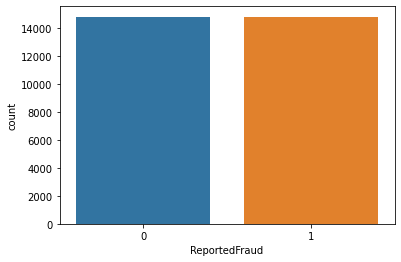

In [ ]:
sns.countplot(x = y_train1)

#Model Building

logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x_train1, y_train1)

LogisticRegression()

In [ ]:
y_predlr = lor.predict(x_test)
y_predlr

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
yt_predlr = lor.predict(x_train1)
yt_predlr

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import classification_report

0.9328401340885447

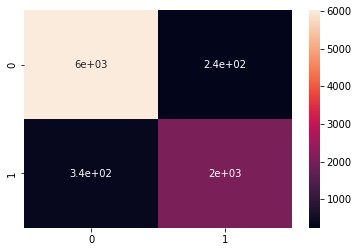

In [ ]:
cn = confusion_matrix(y_test, y_predlr)
sns.heatmap(cn, annot=True)
log_acc = accuracy_score(y_test, y_predlr)
log_acc

In [ ]:
log_train_f1 = f1_score(y_train1, yt_predlr)

In [ ]:
log_test_f1 = f1_score(y_test, y_predlr)

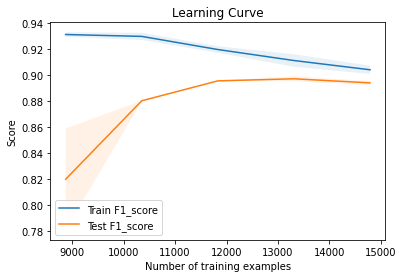

CPU times: user 48.3 s, sys: 8.41 s, total: 56.7 s
Wall time: 35.4 s


In [ ]:
%%time
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the number of training examples to use for each iteration
train_sizes, train_scores, test_scores = learning_curve(lor, x_train1, y_train1, cv=2, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores for each iteration
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Train F1_score')
plt.plot(train_sizes, test_mean, label='Test F1_score')

# Add error bands to the plot
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and legend to the plot
plt.xlabel('Number of training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')

plt.show()


In [ ]:
y_final = lor.predict(total_test)
y_final

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier  
Classifier= RandomForestClassifier(n_estimators= 10)  
Classifier.fit(x_train1,y_train1)

CPU times: user 1.87 s, sys: 95.9 ms, total: 1.97 s
Wall time: 1.96 s


RandomForestClassifier(n_estimators=10)

In [ ]:
#Classifier.best_params_

In [ ]:
y_predrf = Classifier.predict(x_test)
y_predrf

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
yt_predrf = Classifier.predict(x_train1)
yt_predrf

array([0, 1, 0, ..., 1, 1, 1])

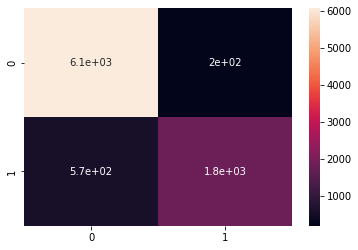

In [ ]:
cn = confusion_matrix(y_test, y_predrf)
sns.heatmap(cn, annot=True)
rf_acc = accuracy_score(y_test, y_predrf)

In [ ]:
rf_train_f1 = f1_score(y_train1, yt_predrf)

In [ ]:
rf_test_f1 = f1_score(y_train1, yt_preddt)

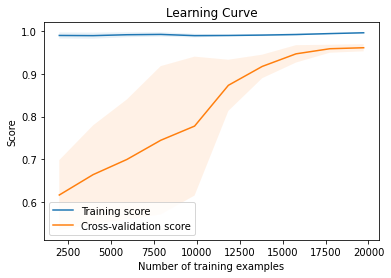

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the number of training examples to use for each iteration
train_sizes, train_scores, test_scores = learning_curve(Classifier, x_train1, y_train1, cv=3, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores for each iteration
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

# Add error bands to the plot
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and legend to the plot
plt.xlabel('Number of training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')

plt.show()


In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [120, 150, 170],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [None, 1, 2],
    'min_samples_leaf': [None, 1, 2]
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

grid_searchrf = GridSearchCV(rf, param_grid, cv = 5,n_jobs=-1)
grid_searchrf.fit(x_train1,y_train1)

CPU times: user 33.2 s, sys: 1.82 s, total: 35 s
Wall time: 24min 47s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [None, 1, 2],
                         'min_samples_split': [None, 1, 2],
                         'n_estimators': [120, 150, 170]})

In [ ]:
train_pred_gdrf = grid_searchrf.predict(x_train1)
test_pred_gdrf = grid_searchrf.predict(x_test)

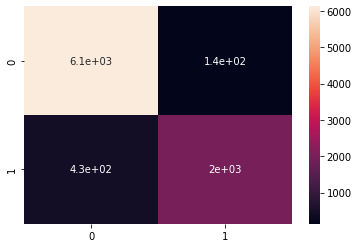

In [ ]:
cn = confusion_matrix(y_test, test_pred_gdrf)
sns.heatmap(cn, annot=True)
rf_gd_acc = accuracy_score(y_test, test_pred_gdrf)

In [ ]:
rfgd_test_f1 = f1_score(y_test, test_pred_pg)

In [ ]:
rfgd_train_f1 = f1_score(y_train1, train_pred_pg)


###Decission Tree Classifier

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth =  15,min_samples_leaf = 1,min_samples_split= 4)
dt.fit(x_train1,y_train1)

CPU times: user 2.46 s, sys: 209 ms, total: 2.67 s
Wall time: 2.66 s


DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=4)

In [ ]:
y_preddt = dt.predict(x_test)
yt_preddt = dt.predict(x_train1)

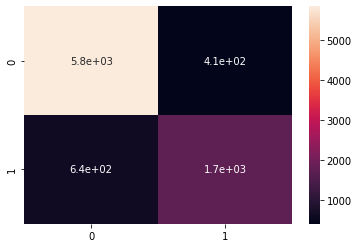

In [ ]:
cn = confusion_matrix(y_test, y_preddt)
sns.heatmap(cn, annot=True)
dt_acc = accuracy_score(y_test, y_preddt)

In [ ]:
dt_test_f1 = f1_score(y_test, y_preddt)

In [ ]:
dt_train_f1 = f1_score(y_train1, yt_preddt)

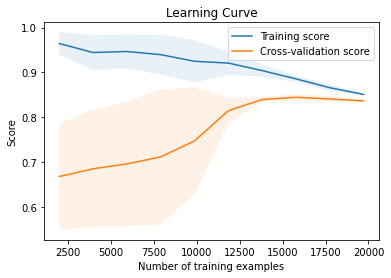

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the number of training examples to use for each iteration
train_sizes, train_scores, test_scores = learning_curve(dt, x_train1, y_train1, cv=3, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores for each iteration
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

# Add error bands to the plot
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and legend to the plot
plt.xlabel('Number of training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')

plt.show()


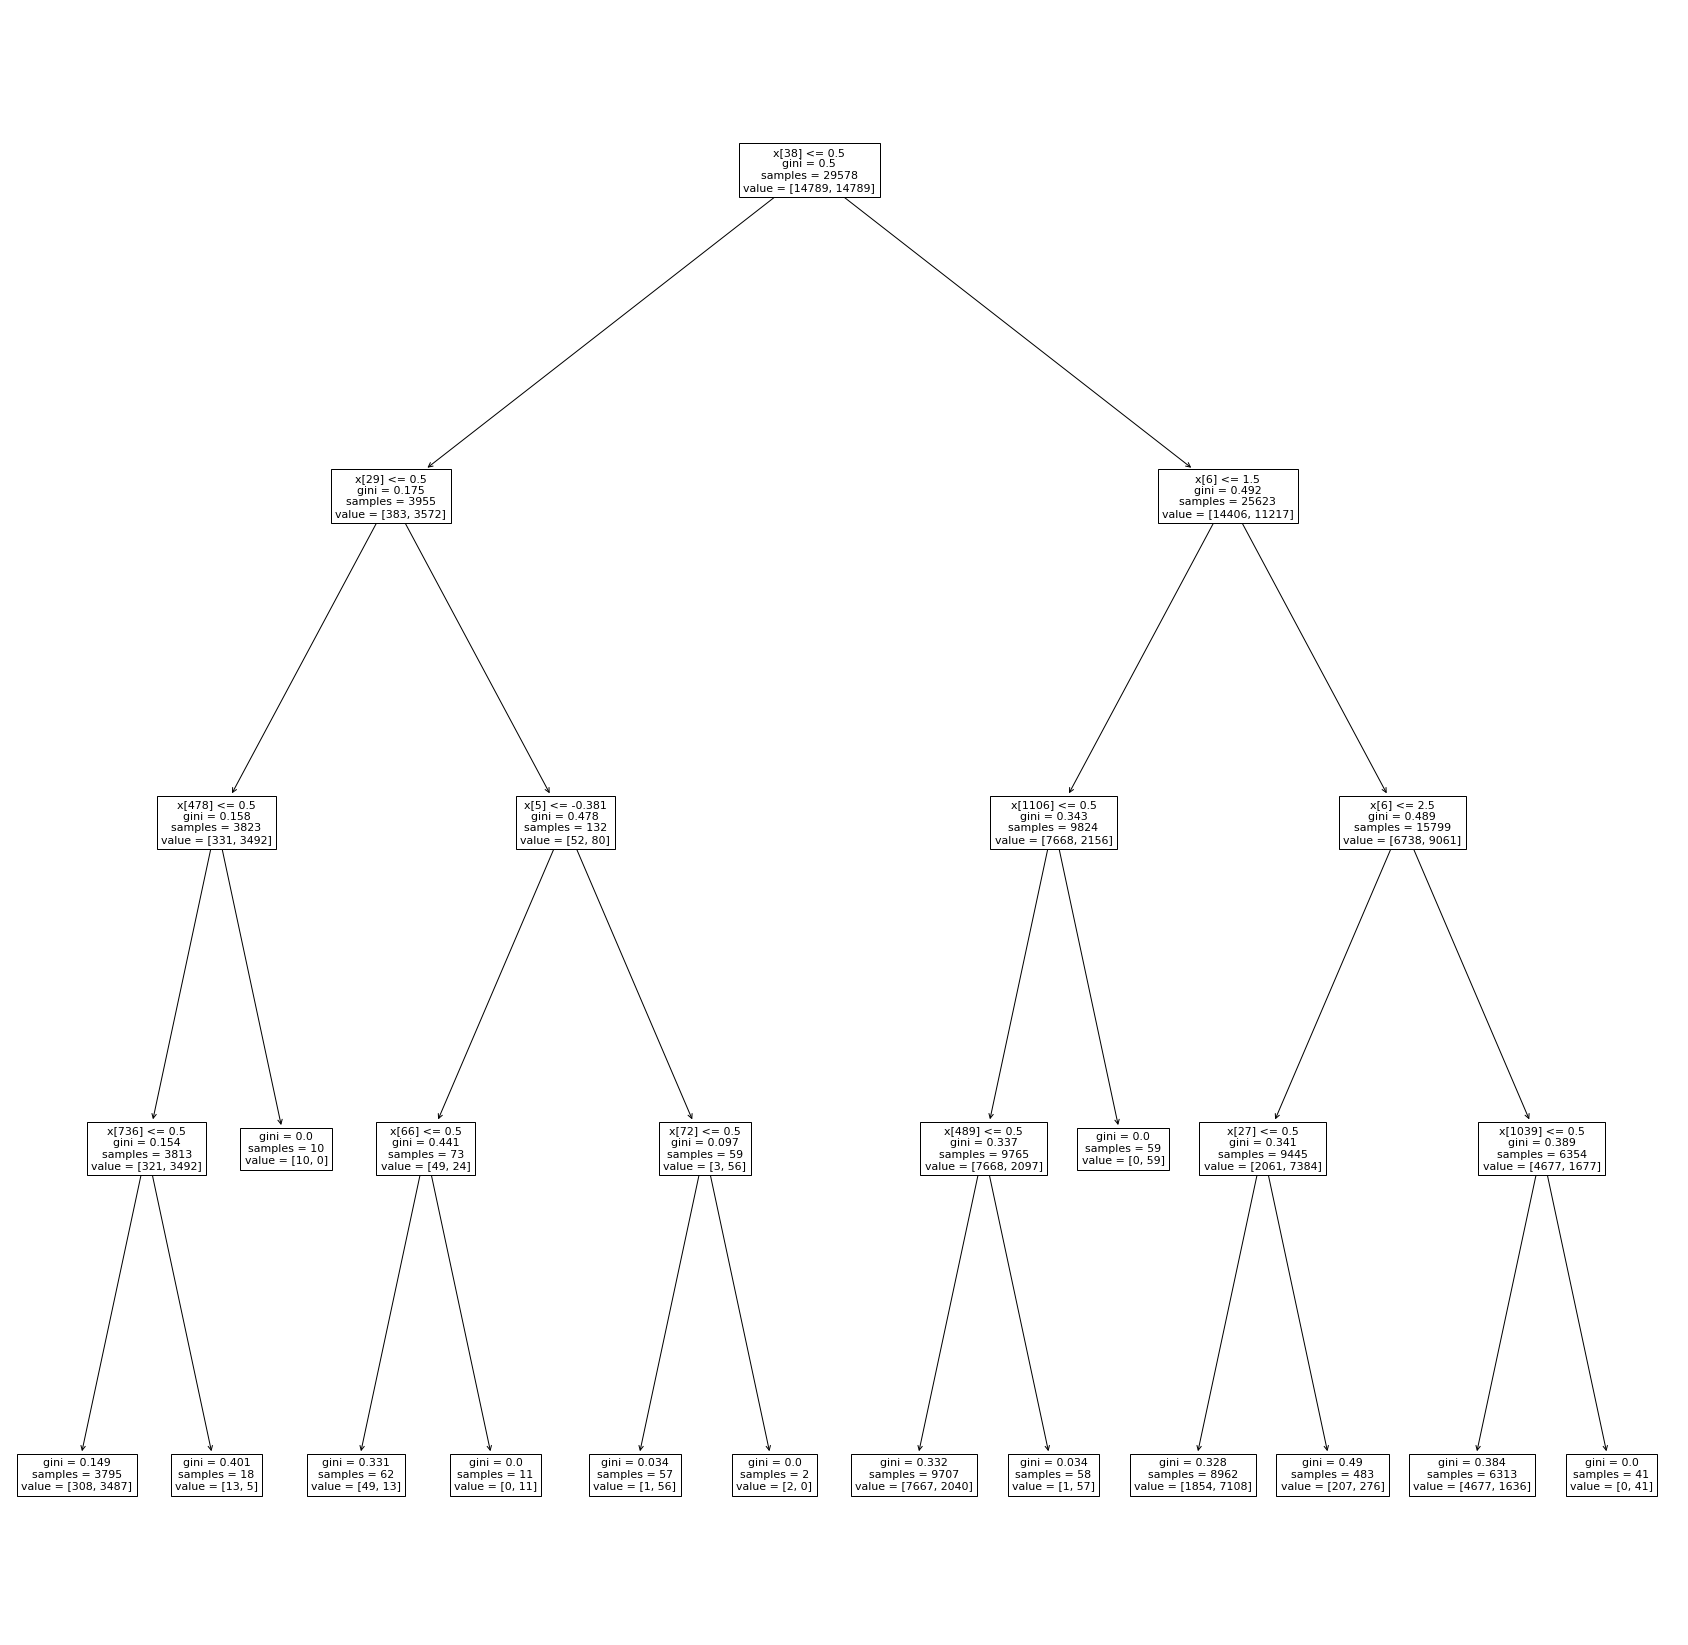

In [ ]:
#tree_rules = export_text(dt, feature_names=x_train1['feature_names'])
from sklearn.tree import plot_tree
dt = DecisionTreeClassifier(max_depth = 4) 
dt.fit(x_train1,y_train1)

plt.figure(figsize=(30, 30))
plot_tree(dt)
plt.show()

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(dt, filled=True,feature_names=x_train1.columns, class_names=x_train1.columns)
plt.show()

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

grid_params1 = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [15, 17, 19, 20],
    'min_samples_split' : [2,3,4],
    'min_samples_leaf' : [None,1,2]
}

grid_search1 = GridSearchCV(dt, grid_params, cv = 3,n_jobs=-1)
grid_search1.fit(x_train1, y_train1)

CPU times: user 5.89 s, sys: 838 ms, total: 6.73 s
Wall time: 4min 42s


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(max_depth=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 11, 13, 15],
                         'min_samples_leaf': [None, 1, 2],
                         'min_samples_split': [4, 5, 6]})

In [ ]:
grid_search1.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [ ]:
train_pred_gd1 = grid_search1.predict(x_train1)
test_pred_gd1 = grid_search1.predict(x_test)

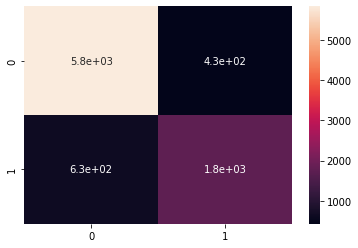

In [ ]:
cn = confusion_matrix(y_test, test_pred_gd1)
sns.heatmap(cn, annot=True)
dtgd_acc = accuracy_score(y_test, test_pred_gd1)

In [ ]:
dtgd_test_f1 = f1_score(y_test, test_pred_gd1)

In [ ]:
dtgd_train_f1 = f1_score(y_train1, train_pred_gd1)

###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn = KNeighborsClassifier(n_neighbors=30,metric='minkowski', p=2 )  
knn.fit(x_train1, y_train1)  

KNeighborsClassifier(n_neighbors=30)

In [ ]:
y_predk = knn.predict(x_test)

In [ ]:
yt_predk = knn.predict(x_train1)

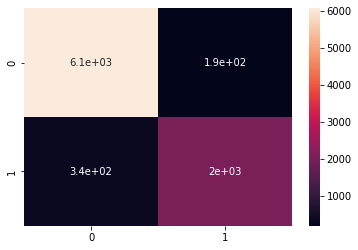

In [ ]:
cn = confusion_matrix(y_test, y_predk)
sns.heatmap(cn, annot=True)
knn_acc = accuracy_score(y_test, y_predk)

In [ ]:
knn_test_f1 = f1_score(y_test, y_predk)

In [ ]:
knn_train_f1 = f1_score(y_train1, yt_predk)

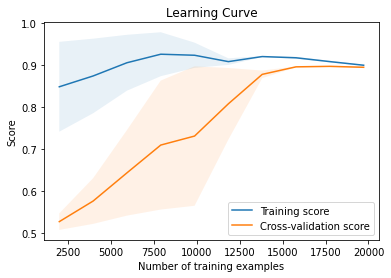

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the number of training examples to use for each iteration
train_sizes, train_scores, test_scores = learning_curve(knn, x_train1, y_train1, cv=3, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores for each iteration
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

# Add error bands to the plot
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and legend to the plot
plt.xlabel('Number of training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')

plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn1 = KNeighborsClassifier(n_neighbors=5)  
knn1.fit(x_train1, y_train1)  

In [ ]:
y_predk1 = knn1.predict(x_test)
yt_predk1 = knn1.predict(x_train1)

In [ ]:
cn = confusion_matrix(y_test, y_predk1)
sns.heatmap(cn, annot=True)
knn_acc1 = accuracy_score(y_test, y_predk1)

In [ ]:
knn1_test_f1 = f1_score(y_test, y_predk1)

In [ ]:
knn1_train_f1 = f1_score(y_train1, yt_predk1)

##SVC

In [ ]:
%%time
from sklearn.svm import SVC
svc = SVC(kernel='rbf', random_state=3)
svc.fit(x_train1, y_train1)

y_pred = svc.predict(x_test)
yt_pred = svc.predict(x_train1)

CPU times: user 26min 54s, sys: 1.73 s, total: 26min 56s
Wall time: 27min 1s


0.9416252456363426

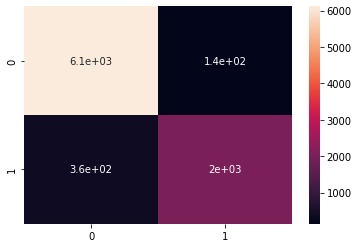

In [ ]:
cn = confusion_matrix(y_test, y_pred)
sns.heatmap(cn, annot=True)
svc_acc = accuracy_score(y_test, y_pred)
svc_acc

In [ ]:
svc_test_f1 = f1_score(y_test, y_pred)

In [ ]:
svc_train_f1 = f1_score(y_train1, yt_pred)

In [ ]:
svc_test_f1

0.8892786669590002

In [ ]:
svc_train_f1

0.9131828166072521

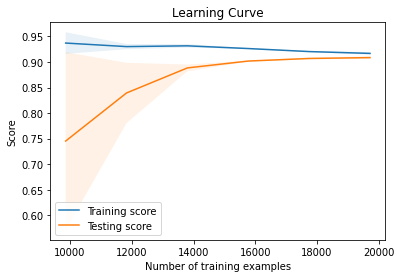

CPU times: user 2h 34min 10s, sys: 20.8 s, total: 2h 34min 31s
Wall time: 2h 37min 18s


In [ ]:
%%time
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Define the number of training examples to use for each iteration
train_sizes, train_scores, test_scores = learning_curve(svc, x_train1, y_train1, cv=3, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores for each iteration
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Testing score')

# Add error bands to the plot
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and legend to the plot
plt.xlabel('Number of training examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')

plt.show()


In [ ]:
model = pd.DataFrame({
    'model' : ['LogisticRegression', 'KNN', 'DecessionTree', 'RandomForest', 'SVC', 'Grid search_DT'],
    'Accuracy' : [log_acc, knn_acc, dt_acc, rf_acc,svc_acc,dtgd_acc],
    'train_f1_score' : [log_train_f1, knn_train_f1, dt_train_f1, rf_train_f1,svc_train_f1,dtgd_train_f1],
    'test_f1_score' : [log_test_f1, knn_test_f1, dt_test_f1, rf_test_f1, svc_test_f1,dtgd_test_f1]
})
model

,model,Accuracy,train_f1_score,test_f1_score
0,LogisticRegression,0.932840,0.898292,0.875881
1,KNN,0.938735,0.896417,0.896417
2,DecessionTree,0.878049,0.855889,0.767979
3,RandomForest,0.912033,0.998749,0.855889
4,SVC,0.941625,0.913183,0.913183
5,Grid search_DT,0.877240,0.855900,0.767717


In [ ]:
y_final = svc.predict(total_test)
y_final

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
sample = pd.read_excel('/content/drive/MyDrive/chakri_test/Sample_Submission.xlsx')

In [ ]:
sample

,CustomerID,ReportedFraud
0,Cust10008,1
1,Cust10010,0
2,Cust10015,0
3,Cust10020,0
4,Cust1003,0
...,...,...
8907,Cust37942,0
8908,Cust20528,0
8909,Cust36797,0
8910,Cust28499,0


In [ ]:
sample['ReportedFraud'] = y_final

In [ ]:
sample['ReportedFraud']

0       0
1       0
2       0
3       0
4       0
       ..
8907    0
8908    0
8909    0
8910    0
8911    0
Name: ReportedFraud, Length: 8912, dtype: int64

In [ ]:
sample['ReportedFraud'].value_counts()

0    7473
1    1439
Name: ReportedFraud, dtype: int64

In [ ]:
sample

,CustomerID,ReportedFraud
0,Cust10008,0
1,Cust10010,0
2,Cust10015,0
3,Cust10020,0
4,Cust1003,0
...,...,...
8907,Cust37942,0
8908,Cust20528,0
8909,Cust36797,0
8910,Cust28499,0


In [ ]:
sample.to_csv('my_predictons.csv', index = False)